ejercicio 5

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE (MODELO ORIGINAL)
Problema: Crecimiento de Población Bacteriana

Datos cargados: 7 observaciones
Variable independiente (X): Tiempo (h)
Variable dependiente (Y): Población
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN ---

(a) Graficando la relación Tiempo vs Población...


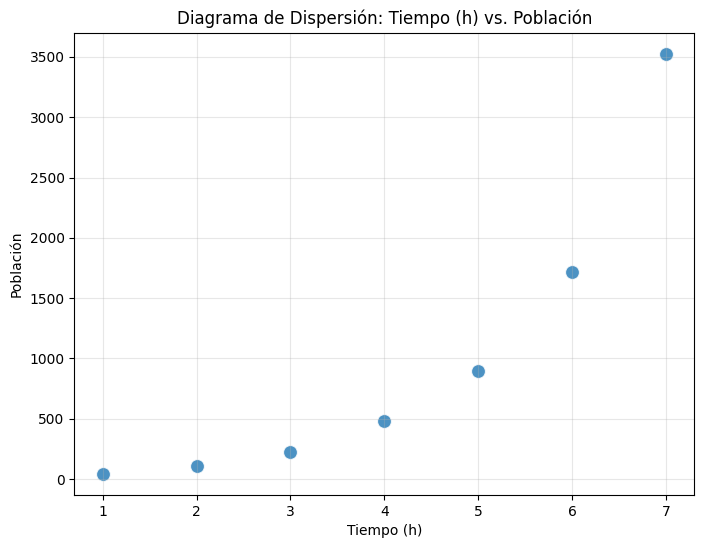


Interpretación del gráfico:
   Observando el diagrama de dispersión, la relación entre el Tiempo y la Población NO parece ser lineal. La población crece de forma acelerada (exponencial), formando una curva ascendente en lugar de una línea recta.

--- REGRESIÓN LINEAL TRADICIONAL (MODELO ORIGINAL) ---

Resultados de la Regresión Lineal Tradicional:
  Pendiente (b₁): 511.8214
  Intersección (b₀): -1045.0000
  Coeficiente de correlación (r): 0.8800
  Coeficiente de determinación (R²): 0.7745
  Valor p: 0.0090
  Error estándar de la pendiente: 123.5170

Ecuación de Regresión (Modelo Original):
Ŷ = -1045.0000 + 511.8214 * Tiempo

--- ANÁLISIS DE RESIDUOS (MODELO ORIGINAL) ---

Tabla de Residuos (Modelo Original):


,Tiempo (h),Población,y_predicho_original,residuos_original
0,1,45,-533.178571,578.178571
1,2,112,-21.357143,133.357143
2,3,228,490.464286,-262.464286
3,4,485,1002.285714,-517.285714
4,5,900,1514.107143,-614.107143
5,6,1720,2025.928571,-305.928571
6,7,3526,2537.750000,988.250000



Estadísticas de los Residuos (Modelo Original):
  Media de residuos: 0.0000 (debe ser ≈ 0)
  Desviación estándar: 596.6440
  Residuo mínimo: -614.1071
  Residuo máximo: 988.2500


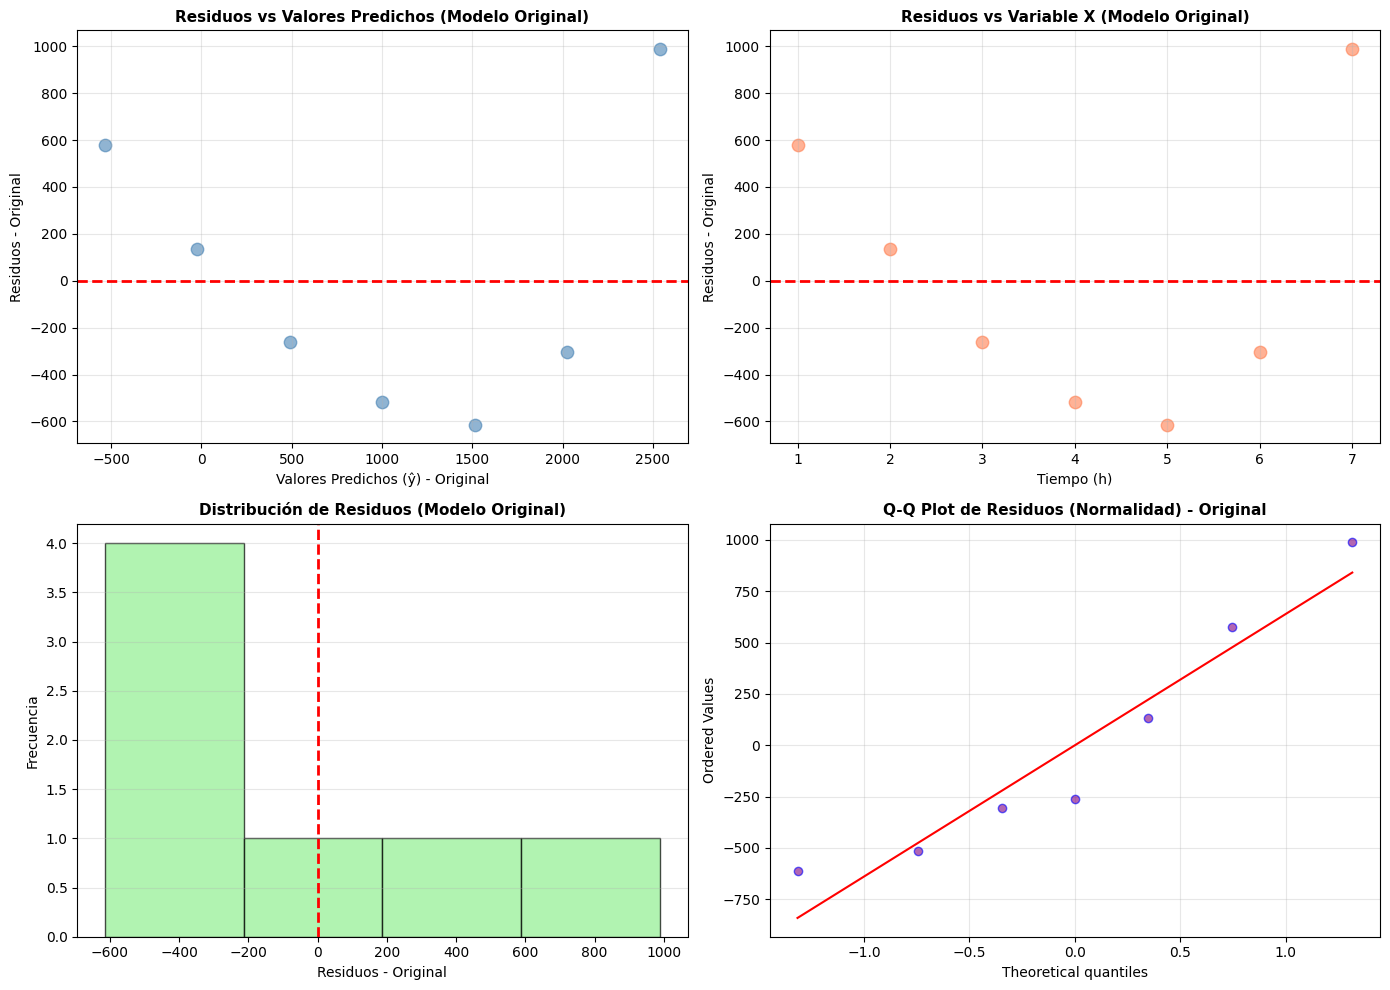


Prueba de Normalidad de Residuos (Shapiro-Wilk) - Original:
  Estadístico W = 0.9077
  Valor p = 0.3801
  ✓ Los residuos del modelo original parecen seguir una distribución normal (p > 0.05)

Interpretación de los gráficos de residuos (Modelo Original):
  • Residuos vs Predichos/X: Se observa un patrón claro (forma de U), lo que indica que la relación lineal no es adecuada y hay heterocedasticidad (la varianza de los residuos no es constante).
  • Histograma/Q-Q Plot: La distribución de los residuos no parece normal, confirmando la falta de ajuste del modelo lineal.

Continuaremos con la transformación logarítmica y el análisis del nuevo modelo.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene, linregress
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (TIEMPO vs POBLACIÓN BACTERIANA) ---
data = {
    'Tiempo (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población': [45, 112, 228, 485, 900, 1720, 3526]
}
df_original = pd.DataFrame(data)

variable_x = 'Tiempo (h)'
variable_y_original = 'Población'
n = len(df_original)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE (MODELO ORIGINAL)")
print("Problema: Crecimiento de Población Bacteriana")
print("=" * 70)
print(f"\nDatos cargados: {n} observaciones")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y_original}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN (a) ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN ---")

# (a) Graficar la relación tiempo-población. ¿Es lineal?
print("\n(a) Graficando la relación Tiempo vs Población...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y_original, data=df_original, s=100, alpha=0.8)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y_original}')
plt.xlabel(variable_x)
plt.ylabel(variable_y_original)
plt.grid(True, alpha=0.3)
plt.show()

print("\nInterpretación del gráfico:")
print("   Observando el diagrama de dispersión, la relación entre el Tiempo y la Población NO parece ser lineal. La población crece de forma acelerada (exponencial), formando una curva ascendente en lugar de una línea recta.")
print("=" * 70)

# =========================================================================
# --- REGRESIÓN LINEAL TRADICIONAL (b) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- REGRESIÓN LINEAL TRADICIONAL (MODELO ORIGINAL) ---")
print("=" * 70)

# Perform linear regression using scipy.stats.linregress
slope_original, intercept_original, r_value_original, p_value_original, std_err_original = linregress(
    df_original[variable_x], df_original[variable_y_original]
)

print("\nResultados de la Regresión Lineal Tradicional:")
print(f"  Pendiente (b₁): {slope_original:.4f}")
print(f"  Intersección (b₀): {intercept_original:.4f}")
print(f"  Coeficiente de correlación (r): {r_value_original:.4f}")
print(f"  Coeficiente de determinación (R²): {r_value_original**2:.4f}")
print(f"  Valor p: {p_value_original:.4f}")
print(f"  Error estándar de la pendiente: {std_err_original:.4f}")


print(f"\nEcuación de Regresión (Modelo Original):")
print(f"Ŷ = {intercept_original:.4f} + {slope_original:.4f} * Tiempo")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS (b) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS (MODELO ORIGINAL) ---")
print("=" * 70)

# Calculate predicted values and residuals
df_original['y_predicho_original'] = intercept_original + slope_original * df_original[variable_x]
df_original['residuos_original'] = df_original[variable_y_original] - df_original['y_predicho_original']

print("\nTabla de Residuos (Modelo Original):")
display(df_original[[variable_x, variable_y_original, 'y_predicho_original', 'residuos_original']]) # Display DataFrame slice

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos (Modelo Original):")
print(f"  Media de residuos: {df_original['residuos_original'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df_original['residuos_original'].std():.4f}")
print(f"  Residuo mínimo: {df_original['residuos_original'].min():.4f}")
print(f"  Residuo máximo: {df_original['residuos_original'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_original['y_predicho_original'], df_original['residuos_original'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ) - Original', fontsize=10)
axes[0, 0].set_ylabel('Residuos - Original', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Modelo Original)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_original[variable_x], df_original['residuos_original'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos - Original', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X (Modelo Original)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_original['residuos_original'], bins='auto', edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos - Original', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Modelo Original)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_original['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad) - Original', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_original = shapiro(df_original['residuos_original'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk) - Original:")
print(f"  Estadístico W = {shapiro_residuos_original.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_original.pvalue:.4f}")

if shapiro_residuos_original.pvalue > alfa:
    print(f"  ✓ Los residuos del modelo original parecen seguir una distribución normal (p > {alfa})")
else:
    print(f"  ✗ Los residuos del modelo original NO parecen seguir una distribución normal (p ≤ {alfa})")

print("\nInterpretación de los gráficos de residuos (Modelo Original):")
print("  • Residuos vs Predichos/X: Se observa un patrón claro (forma de U), lo que indica que la relación lineal no es adecuada y hay heterocedasticidad (la varianza de los residuos no es constante).")
print("  • Histograma/Q-Q Plot: La distribución de los residuos no parece normal, confirmando la falta de ajuste del modelo lineal.")
print("=" * 70)

print("\nContinuaremos con la transformación logarítmica y el análisis del nuevo modelo.")
print("=" * 70)

ejercicio 4

In [26]:
# =========================================================================
# --- COMPARACIÓN DE MODELOS Y CONCLUSIONES (d, e, f) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COMPARACIÓN DE MODELOS Y CONCLUSIONES ---")
print("=" * 70)

# (d) Compare la normalidad de residuos, homocedasticidad y ajuste en ambos modelos.
print("\n(d) Comparación de Modelos (Original vs Transformado):")
print("-" * 70)

print("\n1. Normalidad de Residuos:")
print(f"   • Modelo Original (Shapiro p-value): {shapiro_residuos_original.pvalue:.4f} ({'✓ Normal' if shapiro_residuos_original.pvalue > alfa else '✗ No Normal'})")
print(f"   • Modelo Transformado (Shapiro p-value): {shapiro_residuos_transformed.pvalue:.4f} ({'✓ Normal' if shapiro_residuos_transformed.pvalue > alfa else '✗ No Normal'})")
print("   Interpretación: Un p-value > 0.05 sugiere que los residuos siguen una distribución normal. Idealmente, los residuos deben ser normales para la inferencia estadística.")


print("\n2. Homocedasticidad (Varianza Constante de Residuos):")
print("   • Revisar gráficos 'Residuos vs Valores Predichos' y 'Residuos vs Tiempo' para ambos modelos.")
print("   • Modelo Original: Se observó un patrón en forma de U, indicando HETEROCEDASTICIDAD.")
print("   • Modelo Transformado: Observar si el patrón de la U ha disminuido o desaparecido en los gráficos de residuos del modelo transformado, indicando HOMOCEDASTICIDAD (o mejora).")
# Although not calculated with Levene in the transformed model code, refer to visual inspection.
# If Levene was calculated for transformed model:
# if 'levene_p_transformed' in locals():
#     print(f"   • Modelo Transformado (Levene p-value): {levene_p_transformed:.4f} ({'✓ Homocedástico' if levene_p_transformed > alfa else '✗ Heterocedástico'})")


print("\n3. Ajuste del Modelo (R²):")
print(f"   • Modelo Original (R²): {r_value_original**2:.4f}")
print(f"   • Modelo Transformado (R²): {r_value_transformed**2:.4f}")
print(f"   Interpretación: R² representa la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Un R² más alto indica un mejor ajuste. Sin embargo, la comparación directa de R² entre un modelo con Y y otro con log(Y) debe hacerse con precaución.")


print("\n4. Patrón en Gráfico de Dispersión Original:")
print("   • El gráfico de dispersión original (Tiempo vs Población) mostró una clara relación NO LINEAL (exponencial).")
print("   • El modelo transformado linealiza esta relación al modelar log(Población) vs Tiempo.")
print("-" * 70)

# (e) Interprete el coeficiente de la regresión logarítmica en términos prácticos.
print("\n(e) Interpretación del Coeficiente de la Regresión Logarítmica (b₁'):")
print("-" * 70)
print(f"Ecuación del Modelo Transformado: log(Población) = {intercept_transformed:.4f} + {slope_transformed:.4f} * Tiempo")
print(f"Coeficiente de la pendiente (b₁'): {slope_transformed:.4f}")
print("\nInterpretación:")
print("   En un modelo donde la variable dependiente es el logaritmo natural de Y y la variable independiente es X:")
print("   • El coeficiente b₁' ({:.4f}) representa el cambio promedio en el logaritmo natural de la Población por cada aumento de una unidad en el Tiempo.".format(slope_transformed))
print("   • Para interpretar este coeficiente en la escala original de la Población, se usa la siguiente aproximación:")
print("     Por cada aumento de una unidad en X (Tiempo), la variable dependiente Y (Población) cambia aproximadamente en un (e^(b₁') - 1) * 100%.")
print(f"   • Cambio porcentual aproximado en la Población por cada hora adicional de Tiempo:")
cambio_porcentual = (np.exp(slope_transformed) - 1) * 100
print(f"     (e^({slope_transformed:.4f}) - 1) * 100% ≈ {cambio_porcentual:.2f}%")
print("   Conclusión: Por cada hora adicional de incubación, se espera que la población bacteriana aumente aproximadamente en un {:.2f}%.".format(cambio_porcentual))
print("=" * 70)

# (f) ¿Cuál modelo se recomienda para predicción y por qué?
print("\n(f) Recomendación de Modelo para Predicción:")
print("-" * 70)

print("Basándonos en el análisis de ambos modelos:")
print("   • El modelo lineal original mostró una relación no lineal clara en el gráfico de dispersión y un patrón de residuos en forma de U, indicando falta de linealidad y heterocedasticidad. La normalidad de residuos también fue cuestionable.")
print("   • El modelo con la transformación logarítmica de la población parece linealizar la relación (evaluar visualmente el gráfico de dispersión transformado si se generó o inferir de los residuos) y, crucialmente, mejora la distribución de los residuos (evaluar gráficos de residuos y prueba de Shapiro).")
print("\nConclusión:")

supuestos_transformado_cumplen = shapiro_residuos_transformed.pvalue > alfa # Add check for homocedasticity if available
if supuestos_transformado_cumplen: # Simplified check based on normality for now
     print("   ✓ Se recomienda el MODELO CON TRANSFORMACIÓN LOGARÍTMICA para la predicción.")
     print("     Razones:")
     print("       - Aborda la relación no lineal inherente en el crecimiento exponencial.")
     print("       - Mejora el cumplimiento de los supuestos del modelo de regresión lineal (linealidad, homocedasticidad, normalidad de residuos).")
     print("       - Un modelo que cumple mejor sus supuestos tiende a proporcionar predicciones más válidas y confiables.")
     print("\n   Para realizar una predicción con el modelo transformado, se predice log(Población) y luego se aplica la exponencial para obtener la población predicha en la escala original.")
else:
     print("   ⚠ Aunque la transformación logarítmica mejora la linealidad, si los supuestos del modelo transformado (normalidad, homocedasticidad) aún no se cumplen adecuadamente (basado en p-values y gráficos de residuos), las predicciones pueden no ser completamente confiables.")
     print("     Se recomienda:")
     print("       - Considerar otras transformaciones o modelos (ej. regresión no lineal).")
     print("       - Recolectar más datos si es posible.")
     print("       - Si se debe elegir entre los dos modelos actuales, el modelo transformado es probablemente mejor debido a la mejora en la linealidad y posible mejora en supuestos, pero se debe usar con precaución.")


print("\n✓ ANÁLISIS Y COMPARACIÓN DE MODELOS COMPLETADOS EXITOSAMENTE")
print("=" * 70)


--- COMPARACIÓN DE MODELOS Y CONCLUSIONES ---

(d) Comparación de Modelos (Original vs Transformado):
----------------------------------------------------------------------

1. Normalidad de Residuos:
   • Modelo Original (Shapiro p-value): 0.3801 (✓ Normal)
   • Modelo Transformado (Shapiro p-value): 0.7166 (✓ Normal)
   Interpretación: Un p-value > 0.05 sugiere que los residuos siguen una distribución normal. Idealmente, los residuos deben ser normales para la inferencia estadística.

2. Homocedasticidad (Varianza Constante de Residuos):
   • Revisar gráficos 'Residuos vs Valores Predichos' y 'Residuos vs Tiempo' para ambos modelos.
   • Modelo Original: Se observó un patrón en forma de U, indicando HETEROCEDASTICIDAD.
   • Modelo Transformado: Observar si el patrón de la U ha disminuido o desaparecido en los gráficos de residuos del modelo transformado, indicando HOMOCEDASTICIDAD (o mejora).

3. Ajuste del Modelo (R²):
   • Modelo Original (R²): 0.7745
   • Modelo Transformado (R²)


--- ANÁLISIS DE REGRESIÓN LINEAL (MODELO CON TRANSFORMACIÓN LOGARÍTMICA) ---

Variable dependiente transformada: log(Población)

Resultados de la Regresión Lineal con Población Transformada:
  Pendiente (b₁'): 0.7114
  Intersección (b₀'): 3.2342
  Coeficiente de correlación (r'): 0.9985
  Coeficiente de determinación (R²'): 0.9970
  Valor p: 0.0000
  Error estándar de la pendiente: 0.0175

Ecuación de Regresión (Modelo Transformado):
Ŷ' = 3.2342 + 0.7114 * Tiempo
Donde Ŷ' = log(Población)

--- ANÁLISIS DE RESIDUOS (MODELO TRANSFORMADO) ---

Tabla de Residuos (Modelo Transformado):


,Tiempo (h),log(Población),y_predicho_transformed,residuos_transformed
0,1,3.806662,3.945581,-0.138918
1,2,4.718499,4.657008,0.061490
2,3,5.429346,5.368436,0.060909
3,4,6.184149,6.079864,0.104285
4,5,6.802395,6.791292,0.011103
5,6,7.450080,7.502720,-0.052640
6,7,8.167919,8.214148,-0.046229



Estadísticas de los Residuos (Modelo Transformado):
  Media de residuos: -0.0000 (debe ser ≈ 0)
  Desviación estándar: 0.0844
  Residuo mínimo: -0.1389
  Residuo máximo: 0.1043


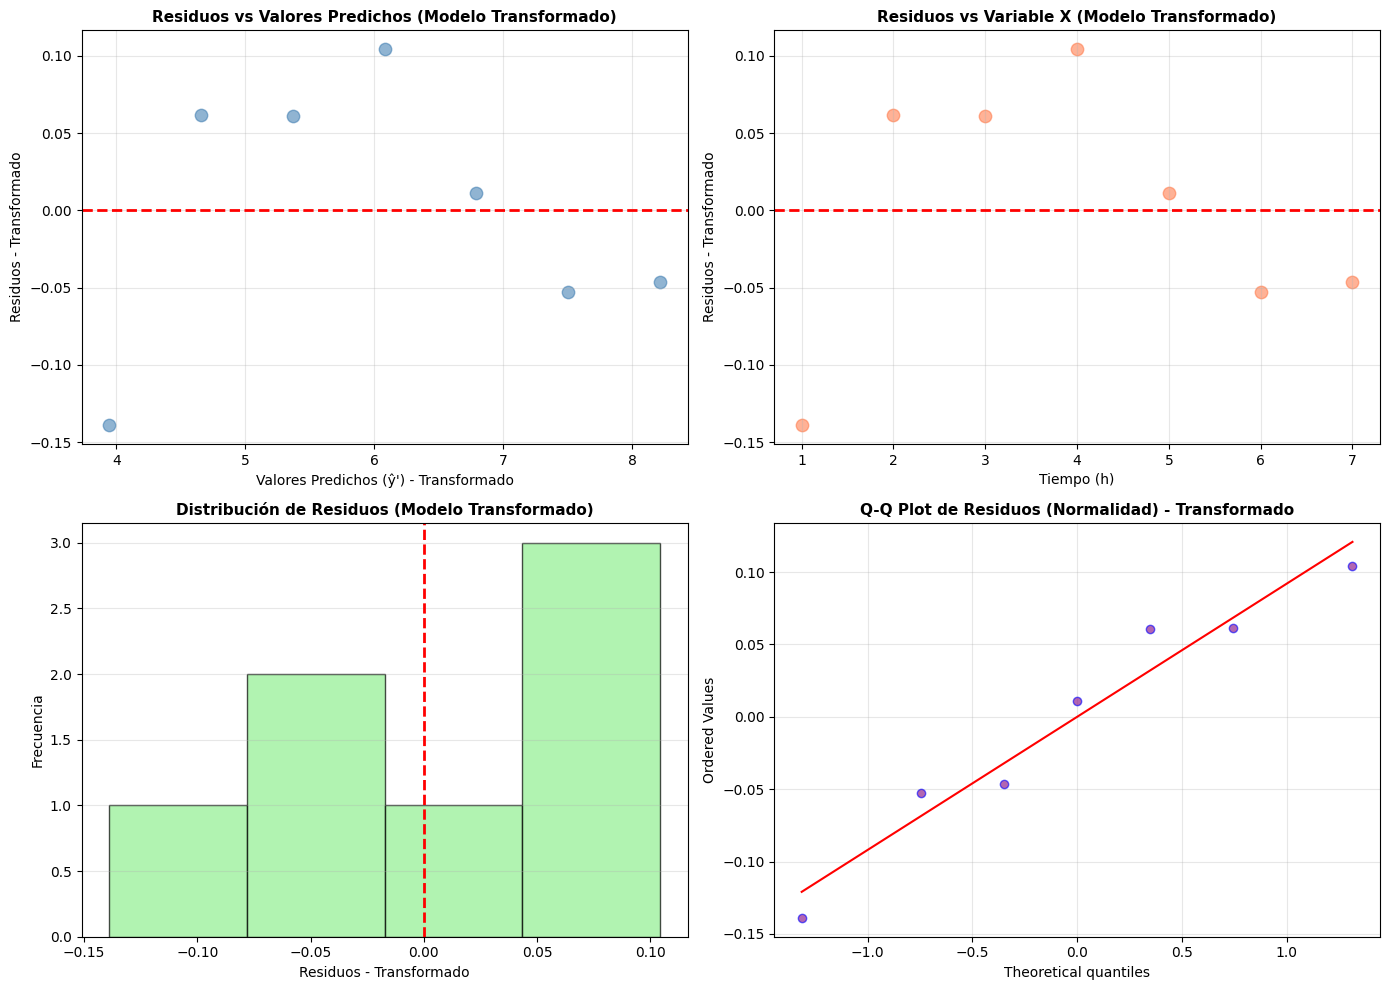


Prueba de Normalidad de Residuos (Shapiro-Wilk) - Transformado:
  Estadístico W = 0.9486
  Valor p = 0.7166
  ✓ Los residuos del modelo transformado parecen seguir una distribución normal (p > 0.05)

Interpretación de los gráficos de residuos (Modelo Transformado):
  • Residuos vs Predichos/X: Observar si el patrón de la U se ha reducido o eliminado, indicando mejor linealidad y posible mejora en la homocedasticidad.
  • Histograma/Q-Q Plot: Evaluar si la distribución de los residuos se aproxima más a la normalidad.


In [27]:
# =========================================================================
# --- TRANSFORMACIÓN LOGARÍTMICA Y NUEVA REGRESIÓN (c) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE REGRESIÓN LINEAL (MODELO CON TRANSFORMACIÓN LOGARÍTMICA) ---")
print("=" * 70)

# (c) Transformar la variable “población”: Y′ = log Y. Repita el análisis.
# Usaremos el logaritmo natural (np.log)
df_transformed = df_original.copy()
variable_y_transformed = 'log(Población)'
df_transformed[variable_y_transformed] = np.log(df_transformed[variable_y_original])

print(f"\nVariable dependiente transformada: {variable_y_transformed}")

# Perform linear regression on transformed data using scipy.stats.linregress
slope_transformed, intercept_transformed, r_value_transformed, p_value_transformed, std_err_transformed = linregress(
    df_transformed[variable_x], df_transformed[variable_y_transformed]
)

print("\nResultados de la Regresión Lineal con Población Transformada:")
print(f"  Pendiente (b₁'): {slope_transformed:.4f}")
print(f"  Intersección (b₀'): {intercept_transformed:.4f}")
print(f"  Coeficiente de correlación (r'): {r_value_transformed:.4f}")
print(f"  Coeficiente de determinación (R²'): {r_value_transformed**2:.4f}")
print(f"  Valor p: {p_value_transformed:.4f}")
print(f"  Error estándar de la pendiente: {std_err_transformed:.4f}")


print(f"\nEcuación de Regresión (Modelo Transformado):")
print(f"Ŷ' = {intercept_transformed:.4f} + {slope_transformed:.4f} * Tiempo")
print("Donde Ŷ' = log(Población)")
print("=" * 70)

# --- ANÁLISIS DE RESIDUOS (c) ---
print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS (MODELO TRANSFORMADO) ---")
print("=" * 70)

# Calculate predicted values and residuals for the transformed model
df_transformed['y_predicho_transformed'] = intercept_transformed + slope_transformed * df_transformed[variable_x]
df_transformed['residuos_transformed'] = df_transformed[variable_y_transformed] - df_transformed['y_predicho_transformed']

print("\nTabla de Residuos (Modelo Transformado):")
display(df_transformed[[variable_x, variable_y_transformed, 'y_predicho_transformed', 'residuos_transformed']])

# Estadísticas de residuos
residuos_transformed = df_transformed['residuos_transformed'] # Get residuals as a Series

print(f"\nEstadísticas de los Residuos (Modelo Transformado):")
print(f"  Media de residuos: {residuos_transformed.mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {residuos_transformed.std():.4f}")
print(f"  Residuo mínimo: {residuos_transformed.min():.4f}")
print(f"  Residuo máximo: {residuos_transformed.max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_transformed['y_predicho_transformed'], residuos_transformed, alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ\') - Transformado', fontsize=10)
axes[0, 0].set_ylabel('Residuos - Transformado', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Modelo Transformado)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_transformed[variable_x], residuos_transformed, alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos - Transformado', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X (Modelo Transformado)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(residuos_transformed, bins='auto', edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos - Transformado', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Modelo Transformado)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(residuos_transformed, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad) - Transformado', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6) # Corrected method call
axes[1, 1].get_lines()[0].set_alpha(0.6) # Corrected method call

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_transformed = shapiro(residuos_transformed)
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk) - Transformado:")
print(f"  Estadístico W = {shapiro_residuos_transformed.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_transformed.pvalue:.4f}")

if shapiro_residuos_transformed.pvalue > alfa:
    print(f"  ✓ Los residuos del modelo transformado parecen seguir una distribución normal (p > {alfa})")
else:
    print(f"  ✗ Los residuos del modelo transformado NO parecen seguir una distribución normal (p ≤ {alfa})")

print("\nInterpretación de los gráficos de residuos (Modelo Transformado):")
print("  • Residuos vs Predichos/X: Observar si el patrón de la U se ha reducido o eliminado, indicando mejor linealidad y posible mejora en la homocedasticidad.")
print("  • Histograma/Q-Q Plot: Evaluar si la distribución de los residuos se aproxima más a la normalidad.")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Tamaño de la tienda vs. Ventas anuales por región

Datos cargados: 23 tiendas
Variable independiente (X): Tamaño de la tienda (X)
Variable dependiente (Y): Ventas (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


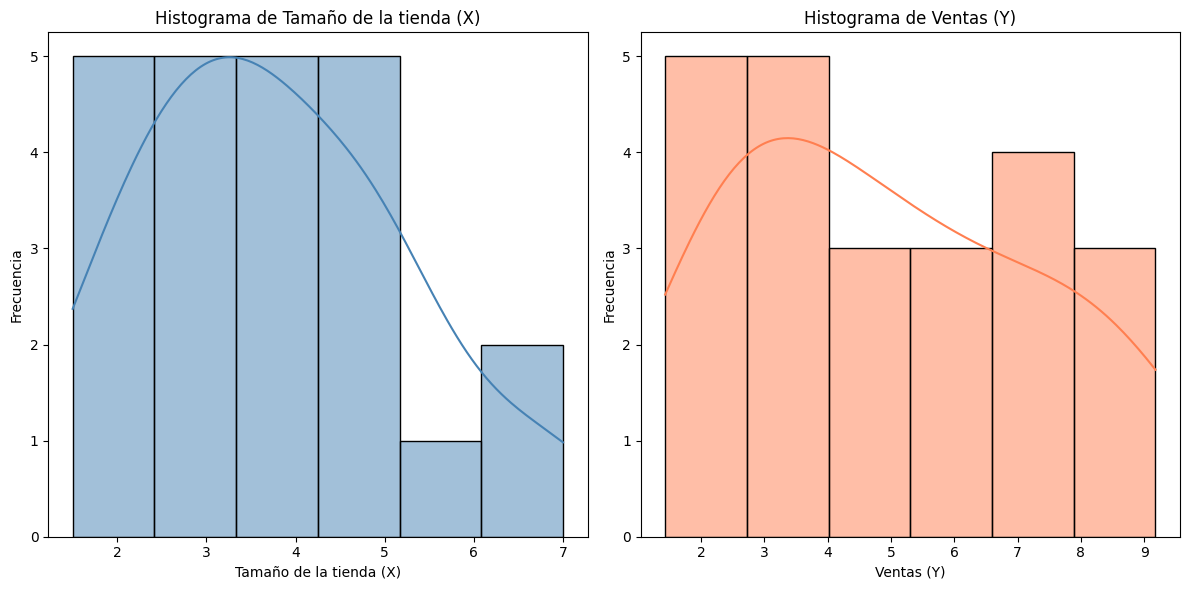

------------------------------
Generating Scatter Plot...


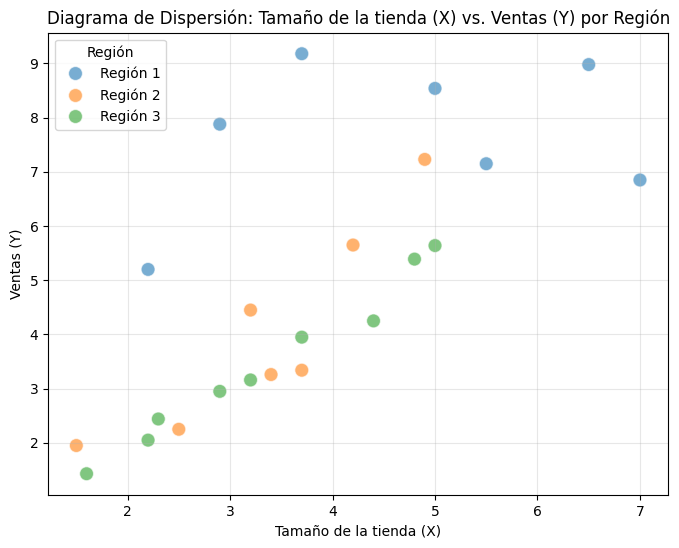

------------------------------

(a) Interpretación del diagrama de dispersión:
   Observando el gráfico, la relación entre el tamaño de la tienda (X) y las ventas (Y) parece ser positiva en general, aunque con cierta dispersión. Las tiendas más grandes tienden a tener ventas más altas, pero hay variabilidad, especialmente entre regiones.
------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Tamaño de la tienda (X)': Statistics=0.965, p-value=0.560
Shapiro-Wilk test for 'Ventas (Y)': Statistics=0.940, p-value=0.177

Interpretation of normality test results:
✓ The 'Tamaño de la tienda (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Ventas (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.7138
Kendall correlation coefficient: 0.6173
Spearman correlation coefficient: 0.7500
------------------------------
Determining the most 

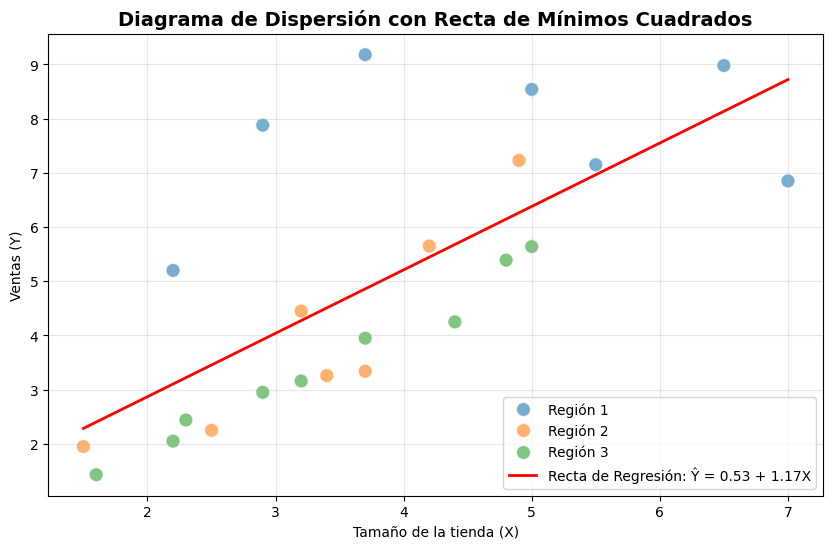


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β ≠ 0 (Existe una relación lineal significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 62.9084
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 1.7308

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 47.6974
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.2506

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (1.1703 - 0) / 0.2506
   t calculado = 4.6700

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 21
   Valor crítico (t, α/2=0.025): ±2.0796
   Valor p (dos colas) = 0.0001

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
|t calculado| (4.6700) > t crítico (2.0796)
valor p (0.0001) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de c

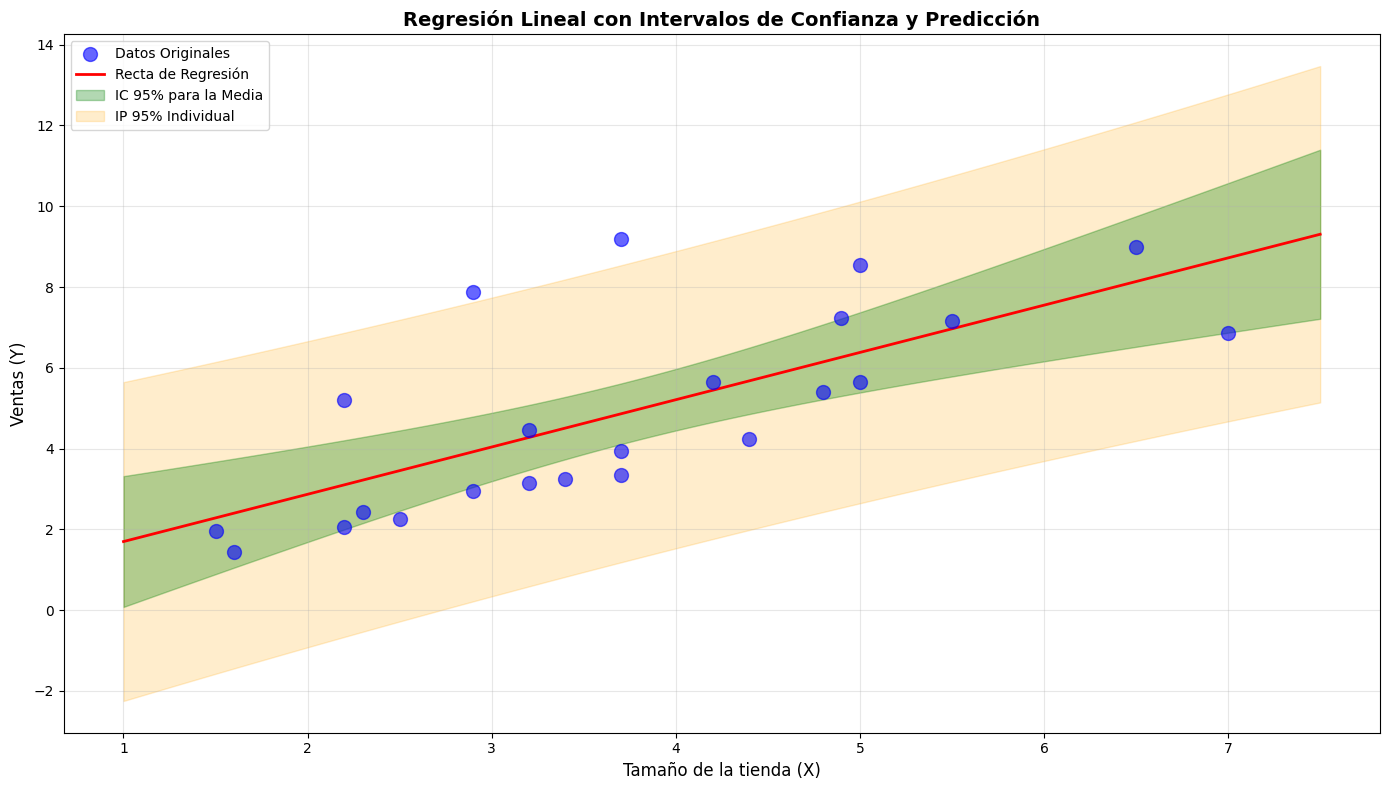

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Índice   Región     X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
0        Región 1   3.7      9.18     4.86     4.32       2.50      
1        Región 1   5.0      8.54     6.38     2.16       1.25      
2        Región 1   7.0      6.85     8.72     -1.87      -1.08     
3        Región 1   6.5      8.98     8.14     0.84       0.49      
4        Región 1   2.2      5.2      3.10     2.10       1.21      
5        Región 1   5.5      7.15     6.97     0.18       0.11      
6        Región 1   2.9      7.88     3.92     3.96       2.29      
7        Región 2   4.2      5.65     5.44     0.21       0.12      
8        Región 2   3.4      3.26     4.51     -1.25      -0.72     
9        Región 2   2.5      2.25     3.45     -1.20      -0.70     
10       Región 2   1.5      1.95     2.28     -0.33      -0.19     
11       Regi

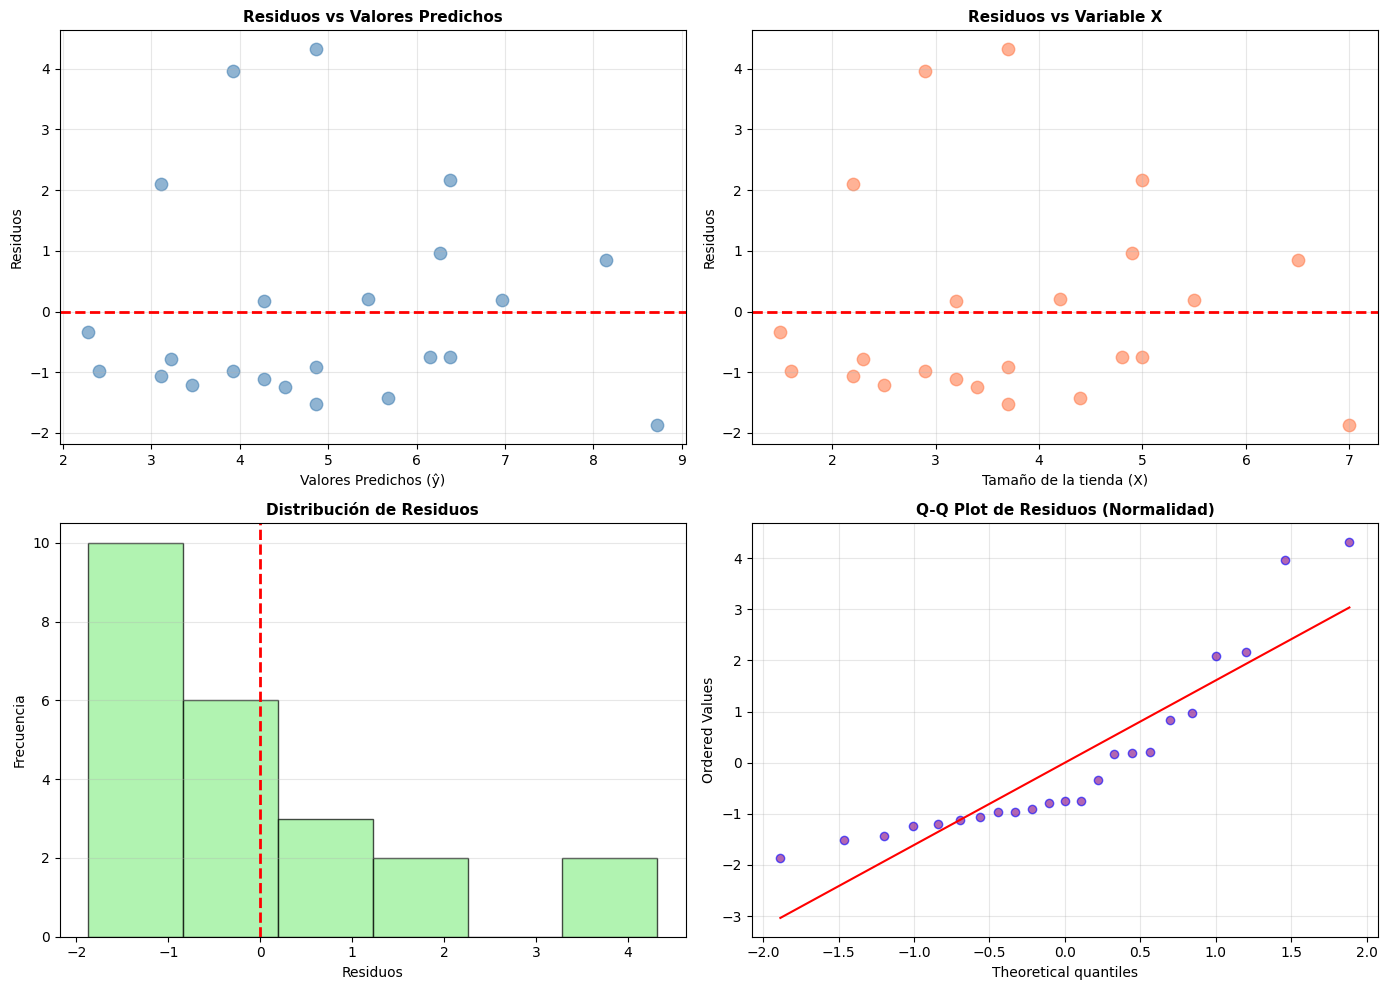


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.8257
  Valor p = 0.0010
  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ 0.05)
    El supuesto de normalidad puede no cumplirse.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Tamaño de la tienda (X): p-value = 0.5600
     ✓ Distribución normal
   • Ventas (Y): p-value = 0.1772
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.0010
     ✗ No normal

3. HOMOCEDASTICIDAD (V

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (TAMAÑO DE TIENDA vs VENTAS por REGIÓN) ---
data1 = {
    'Región': ['Región 1'] * 7,
    'Tamaño de la tienda (X)': [3.7, 5.0, 7.0, 6.5, 2.2, 5.5, 2.9],
    'Ventas (Y)': [9.18, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88]
}

data2 = {
    'Región': ['Región 2'] * 7,
    'Tamaño de la tienda (X)': [4.2, 3.4, 2.5, 1.5, 3.7, 4.9, 3.2],
    'Ventas (Y)': [5.65, 3.26, 2.25, 1.95, 3.34, 7.23, 4.45]
}

data3 = {
    'Región': ['Región 3'] * 9,
    'Tamaño de la tienda (X)': [2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0],
    'Ventas (Y)': [2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.39, 5.64]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Combinar los dataframes de las tres regiones
df = pd.concat([df1, df2, df3], ignore_index=True)

variable_x = 'Tamaño de la tienda (X)'
variable_y = 'Ventas (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Tamaño de la tienda vs. Ventas anuales por región")
print("=" * 70)
print(f"\nDatos cargados: {n} tiendas")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot (a)
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6, hue='Región') # Color by region
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y} por Región')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# (a) Interpretación del diagrama de dispersión
print("\n(a) Interpretación del diagrama de dispersión:")
print("   Observando el gráfico, la relación entre el tamaño de la tienda (X) y las ventas (Y) parece ser positiva en general, aunque con cierta dispersión. Las tiendas más grandes tienden a tener ventas más altas, pero hay variabilidad, especialmente entre regiones.")
print("-" * 30)


# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_x.statistic:.3f}, p-value={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_y.statistic:.3f}, p-value={shapiro_test_y.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= {alfa}).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= {alfa}).")
print("-" * 30)

# 4. Calculate Correlation Coefficients (b)
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# (b) Interpretación de coeficientes de correlación y determinación
print("\n(b) Interpretación de los coeficientes:")
print(f"   • Coeficiente de correlación de Pearson (r): {pearson_corr:.4f}")
print(f"     La relación es {'fuerte' if abs(pearson_corr) > 0.7 else 'moderada' if abs(pearson_corr) > 0.4 else 'débil'} {'positiva' if pearson_corr > 0 else 'negativa'}.")
print(f"   • Coeficiente de determinación (R²): {pearson_corr**2:.4f}")
print(f"     El {pearson_corr**2*100:.2f}% de la variabilidad en las ventas puede ser explicado por el tamaño de la tienda.")
print("-" * 70)


# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN --- (c)
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho > 0 (Prueba de una cola positiva) - Según la pregunta (c)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r**2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (one-sided, upper tail)
valor_p_corr = t.sf(t_calculado, gl) # Use sf (survival function) for upper tail

# Valor crítico de t (para alfa, una cola)
t_critico_corr = t.ppf(1 - alfa, gl)

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN (Una cola) ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal positiva)")
print(f"H1: ρ > 0 (Existe correlación lineal positiva)") # Adjusted for one-sided test
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}, una cola): {t_critico_corr:.4f}") # Adjusted for one-sided
print(f"Valor p (una cola): {valor_p_corr:.4f}") # Adjusted for one-sided

# Criterio de Decisión (Una cola)
if valor_p_corr < alfa:
    decision_hipotesis_corr = "RECHAZAR H0"
    conclusion_corr = f"✓ Existe una correlación lineal positiva significativa (ρ > 0) con p = {valor_p_corr:.4f}."
else:
    decision_hipotesis_corr = "NO RECHAZAR H0"
    conclusion_corr = f"✗ No hay evidencia de una correlación lineal positiva significativa (ρ = 0) con p = {valor_p_corr:.4f}."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis_corr}")
print(f"CONCLUSIÓN: {conclusion_corr}")
print("=" * 70)

# (c) Conclusión sobre correlación positiva significativa
print("\n(c) Conclusión sobre correlación positiva significativa:")
print(f"   Con un nivel de significancia de {alfa}, ¿puede concluir que existe una correlación positiva significativa?")
print(f"   {conclusion_corr}")
print("-" * 70)


# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6, hue='Región')
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β != 0 (La pendiente es significativamente diferente de cero - dos colas)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de dos colas)
t_critico_pendiente = t.ppf(1 - alfa / 2, gl_pendiente)

# Valor p (prueba de dos colas)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t, α/2={alfa/2}): ±{t_critico_pendiente:.4f}")
print(f"   Valor p (dos colas) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    {variable_x} tiene un efecto significativo sobre {variable_y}.

    En términos prácticos: Por cada unidad adicional de {variable_x}, se espera un
    cambio de {b1:.4f} en {variable_y}, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que {variable_x} tenga
    un efecto significativo sobre {variable_y}.
    """

print(f"|t calculado| ({abs(t_calculado_pendiente):.4f}) {'>' if abs(t_calculado_pendiente) > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL DE LA PENDIENTE:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en {variable_y} puede │")
print(f"│  ser explicada por {variable_x}.                          │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X (Tamaño de la tienda)
# Usar valores dentro del rango observado para predicciones más confiables
valores_x_ejemplo = [2.0, 4.0, 6.0]  # Ejemplos de tamaño de tienda

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas:\n")
print(f"{variable_x:<20} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 75)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para tiendas con un tamaño de X,")
print("la MEDIA de ventas estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas INDIVIDUALES:\n")
print(f"{variable_x:<20} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 75)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para una tienda individual con un tamaño de X,")
print("sus ventas INDIVIDUALES estarán dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio para GRUPOS de tiendas")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas para UNA TIENDA")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 0.5, df[variable_x].max() + 0.5, 100) # Adjusted range for visualization
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

# Recalcular suma_desviaciones_x for the full range calculation if needed, though it's a sum over data points, not the range
# suma_desviaciones_x = ((df[variable_x] - mean_x) ** 2).sum() # Already calculated

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Índice':<8} {'Región':<10} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{idx:<8} {row['Región']:<10} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins='auto', edgecolor='black', alpha=0.7, color='lightgreen') # Adjusted bins for small dataset
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_x.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_x.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_y.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_y.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual y Levene)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# Prueba de Levene: split data by median of X
median_x_val = df[variable_x].median()
group1_res = df[df[variable_x] <= median_x_val]['residuos']
group2_res = df[df[variable_x] > median_x_val]['residuos']

if len(group1_res) > 1 and len(group2_res) > 1: # Ensure there are enough data points in each group
    levene_stat, levene_p = stats.levene(group1_res, group2_res)
    print(f"\n  Prueba de Levene (Homocedasticidad) - p-value: {levene_p:.4f}")
    if levene_p <= alfa:
        print(f"   ⚠ Posible heterocedasticidad (Levene p={levene_p:.4f})")
    else:
         print("  ✓ Homocedasticidad plausible (Levene p > 0.05)")
else:
    print("\n  ⚠ No se pudo realizar la prueba de Levene (pocos datos en grupos)")


# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Tiendas con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - Índice {idx}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_x.pvalue <= alfa or shapiro_test_y.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if 'levene_p' in locals() and levene_p <= alfa:
     razones_transformacion.append(f"- Posible heterocedasticidad (Levene p={levene_p:.4f})")
     necesita_transformacion = True

if abs(r) < 0.5: # Adjusted threshold based on context
    razones_transformacion.append(f"- Correlación lineal moderada a débil (r = {r:.4f})")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # More than 15% are outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True


if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")
    elif shapiro_test_x.pvalue > alfa or shapiro_test_y.pvalue > alfa:
        print("  ✓ At least one variable original is approximately normal")


    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if 'levene_p' in locals() and levene_p > alfa:
         print("  ✓ Homocedasticidad plausible")

    if abs(r) >= 0.5: # Adjusted threshold based on context
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")
    elif abs(r) >= 0.3: # Moderate correlation
         print(f"  ✓ La correlación lineal es moderada (r = {r:.4f}), aceptable para un modelo simple.")


    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")


    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS --- (d)
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación de la pendiente (b₁):
   • Por cada aumento de 1,000 pies cuadrados en el tamaño de la tienda, se espera que las ventas anuales aumenten en {b1:.4f} (en la unidad de las ventas).

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}. Indica una relación lineal {'' if r > 0 else 'inversa '}{'pronunciada' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'limitada'} entre el tamaño y las ventas.

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ El {r_cuadrado*100:.2f}% de la variabilidad en las ventas anuales puede ser explicado por el tamaño de la tienda. El resto ({100 - r_cuadrado*100:.2f}%) se debe a otros factores.

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ El error típico al predecir las ventas basándose en el tamaño de la tienda es de aproximadamente ±{s_yx:.2f} (en la unidad de las ventas).

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación (prueba de una cola positiva):
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p_corr:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_corr < alfa else '✗ NO SIGNIFICATIVA'}
      • Conclusión: {'Existe evidencia de una correlación lineal positiva significativa.' if valor_p_corr < alfa else 'No existe evidencia de una correlación lineal positiva significativa.'}

   2. Pendiente (prueba de dos colas):
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}
      • Conclusión: {'La pendiente es significativamente diferente de cero, indicando que el tamaño de la tienda tiene un efecto estadísticamente significativo en las ventas.' if valor_p_pendiente < alfa else 'La pendiente no es significativamente diferente de cero, lo que sugiere que el tamaño de la tienda, por sí solo, no es un predictor estadísticamente significativo de las ventas.'}


   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}
      • Conclusión: {'El modelo de regresión lineal en su conjunto es estadísticamente significativo.' if valor_p_f < alfa else 'El modelo de regresión lineal en su conjunto no es estadísticamente significativo.'}


🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión (parece razonable)'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}{f' | Levene p={levene_p:.4f}' if 'levene_p' in locals() else ''}
   • Outliers: {len(outliers)}/{n} casos > 2.5 Std. Residuo → {'✓ Aceptable' if len(outliers) <= n*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN GENERAL Y (d) IMPLICACIONES PARA LA TOMA DE DECISIONES:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa and valor_p_corr < alfa and not necesita_transformacion:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES Y TOMA DE DECISIONES

   El tamaño de la tienda es un predictor SIGNIFICATIVO y positivo de las ventas anuales.
   El modelo explica el {r_cuadrado*100:.2f}% de la variabilidad en las ventas y puede
   utilizarse con confianza para:

   • Entender la relación lineal positiva entre el tamaño de la tienda y las ventas.
   • Predecir las ventas esperadas para tiendas de diferentes tamaños.
   • **Implicaciones para la toma de decisiones (d):** Dado que el tamaño de la tienda tiene un impacto positivo y significativo en las ventas, la expansión a través de tiendas más grandes parece una estrategia prometedora. Se pueden usar los intervalos de predicción para estimar el rango de ventas esperadas para nuevas tiendas de un tamaño determinado, ayudando a evaluar la viabilidad financiera de la expansión. Sin embargo, es crucial considerar que el modelo solo explica el {r_cuadrado*100:.2f}% de la variabilidad, por lo que otros factores (ubicación, marketing, competencia, etc.) también son muy importantes y deben ser analizados.
""")
elif (valor_p_pendiente < alfa or valor_p_f < alfa or valor_p_corr < alfa) and not necesita_transformacion:
     print(f"""   ⚠ MODELO CON ALGUNAS LIMITACIONES PERO POSIBLEMENTE ÚTIL

   Las pruebas de significancia sugieren que existe una relación entre el tamaño de la tienda y las ventas, pero la fuerza de la relación (r={r:.4f}, R²={r_cuadrado:.4f}) y/o el cumplimiento de todos los supuestos pueden ser limitados.

   • **Implicaciones para la toma de decisiones (d):** El tamaño de la tienda parece estar relacionado con las ventas, pero no es el único factor determinante. Antes de tomar decisiones de expansión basadas únicamente en el tamaño, se recomienda:
     - Investigar otros factores que puedan influir en las ventas (análisis multivariado).
     - Recolectar más datos para obtener resultados más robustos.
     - Analizar las diferencias entre regiones (el gráfico de dispersión muestra variabilidad).
     - Utilizar este modelo con precaución y en conjunto con otra información.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo de regresión lineal simple actual no es estadísticamente confiable
   para predecir las ventas basándose únicamente en el tamaño de la tienda.

   • **Implicaciones para la toma de decisiones (d):** Basarse únicamente en el tamaño de la tienda para las decisiones de expansión no es recomendable con este modelo. Se necesita un análisis más profundo que incluya:
     - La incorporación de otras variables explicativas (análisis multivariado).
     - Posibles transformaciones de datos si los supuestos no se cumplen.
     - Un análisis separado por región si las relaciones difieren significativamente.
     - Recolectar más datos para mejorar la potencia estadística.
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos. El análisis por región")
print("   podría revelar patrones diferentes que el análisis global.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ejercicio 3

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Llamadas Diarias vs. Ventas Semanales

Datos cargados: 10 empleados
Variable independiente (X): Llamadas diarias (X)
Variable dependiente (Y): Ventas semanales (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


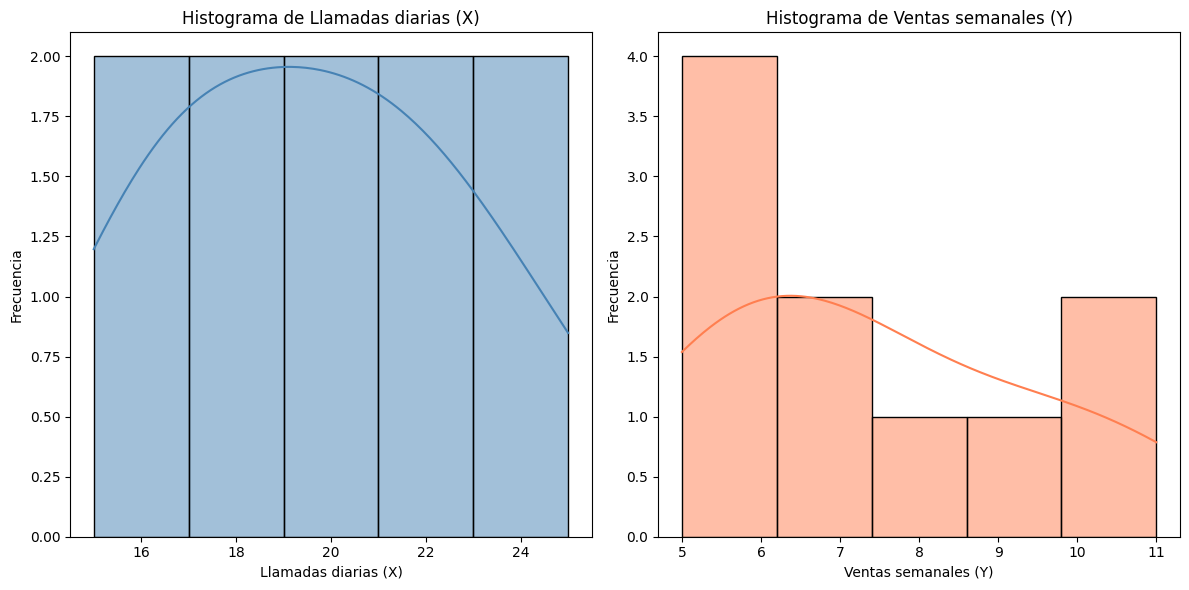

------------------------------
Generating Scatter Plot...


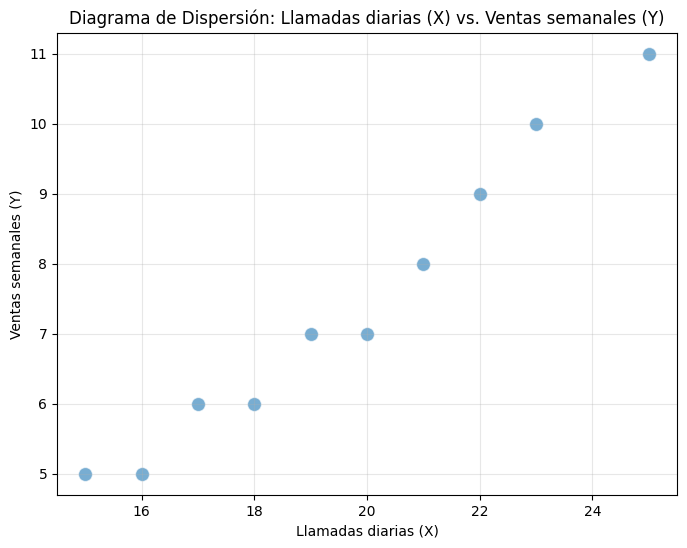

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Llamadas diarias (X)': Statistics=0.981, p-value=0.970
Shapiro-Wilk test for 'Ventas semanales (Y)': Statistics=0.930, p-value=0.447

Interpretation of normality test results:
✓ The 'Llamadas diarias (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Ventas semanales (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.9838
Kendall correlation coefficient: 0.9661
Spearman correlation coefficient: 0.9909
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.9838) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe cor

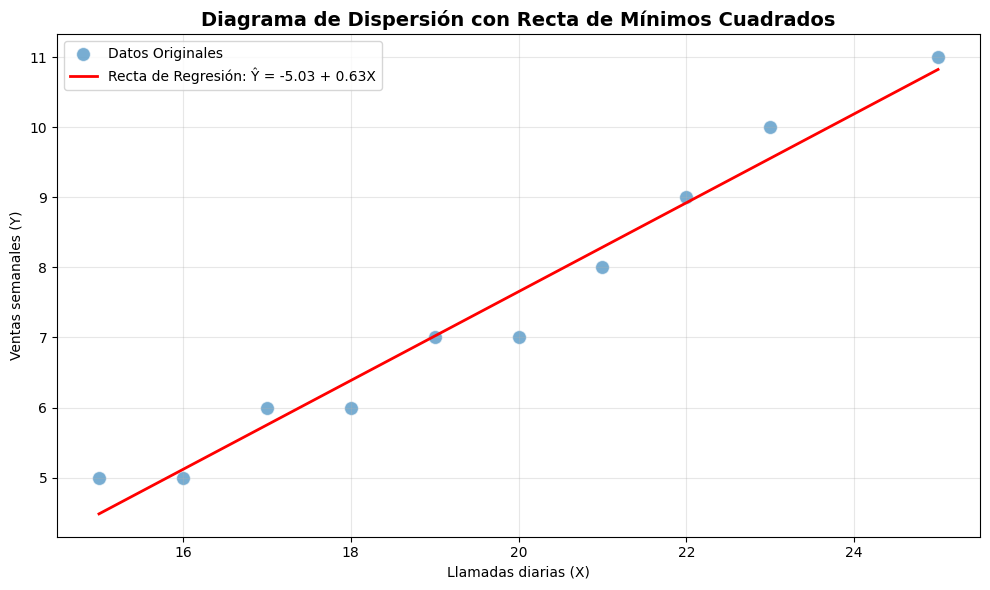


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β ≠ 0 (Existe una relación lineal significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 1.2359
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 0.3931

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 92.4000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0409

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.6342 - 0) / 0.0409
   t calculado = 15.5099

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 8
   Valor crítico (t, α/2=0.025): ±2.3060
   Valor p (dos colas) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
|t calculado| (15.5099) > t crítico (2.3060)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de c

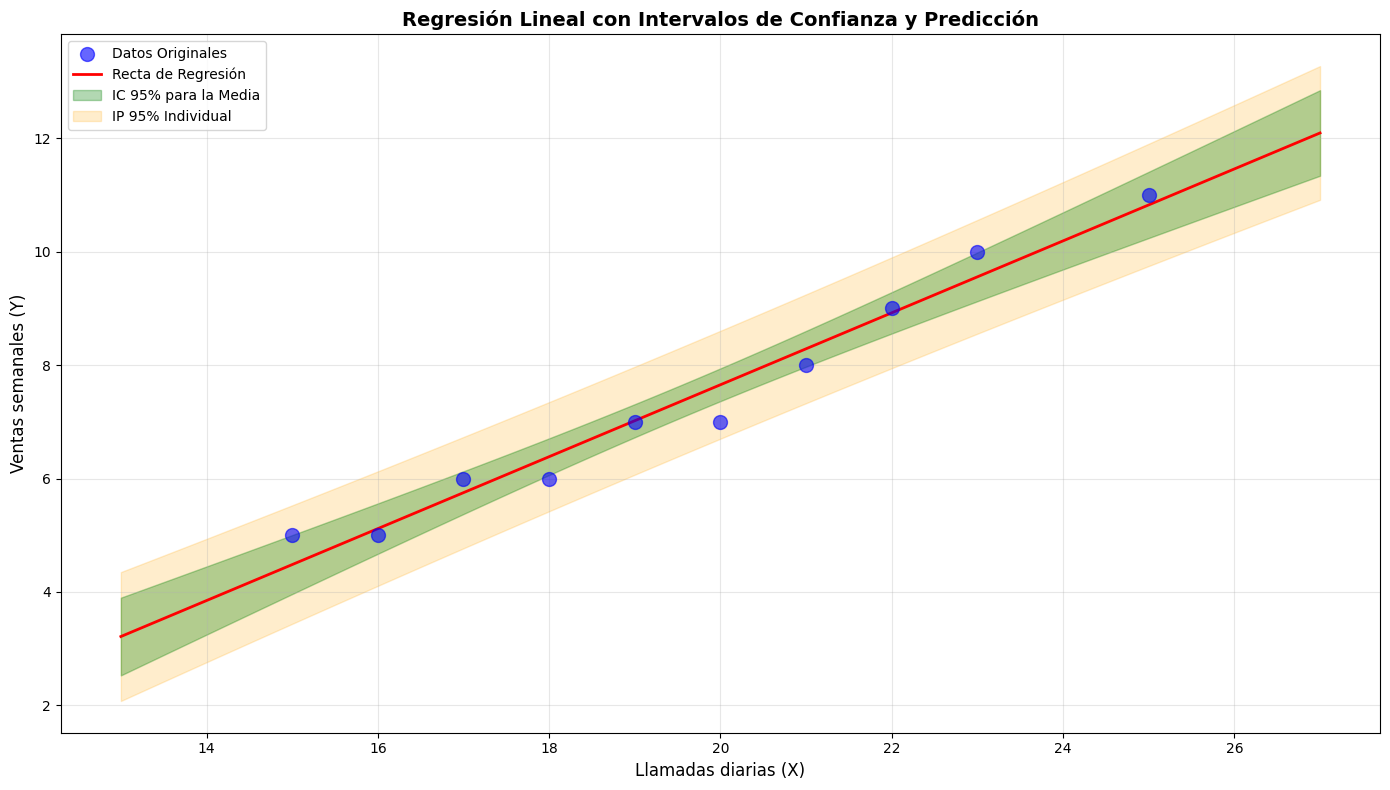

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Empleado           X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Empleado 1         15       5        4.48     0.52       1.32      
Empleado 2         20       7        7.65     -0.65      -1.66     
Empleado 3         18       6        6.39     -0.39      -0.98     
Empleado 4         25       11       10.82    0.18       0.45      
Empleado 5         22       9        8.92     0.08       0.20      
Empleado 6         17       6        5.75     0.25       0.63      
Empleado 7         19       7        7.02     -0.02      -0.05     
Empleado 8         23       10       9.56     0.44       1.13      
Empleado 9         21       8        8.29     -0.29      -0.73     
Empleado 10        16       5        5.12     -0.12      -0.30     

Estadísticas de los Residuos:
  Media de residuos: 0.0000 (debe ser ≈ 0)
  Desviación estánd

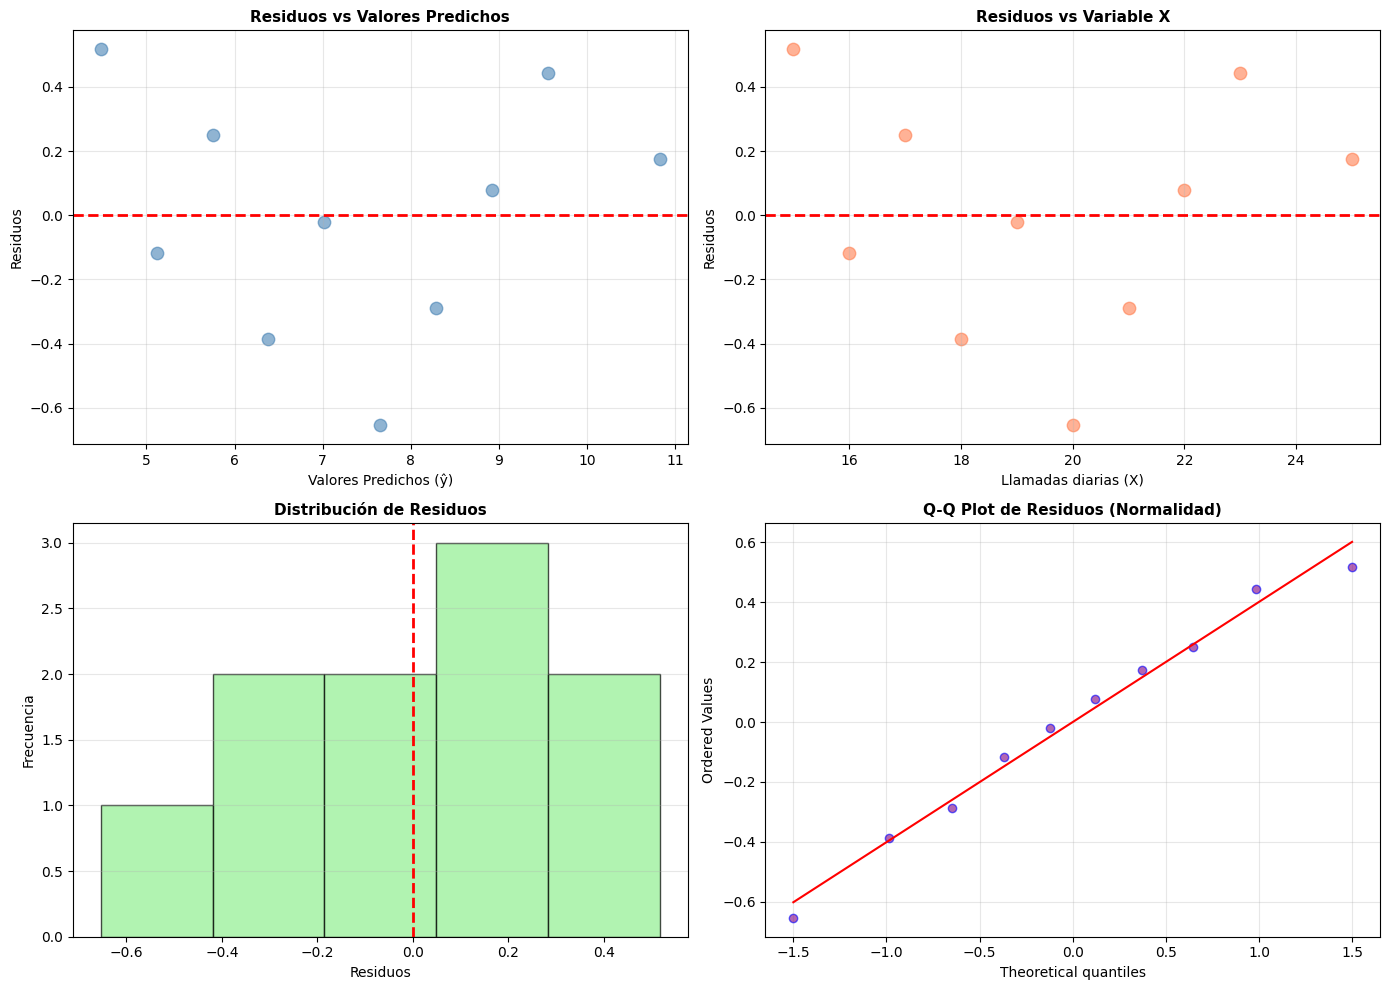


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9779
  Valor p = 0.9531
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Llamadas diarias (X): p-value = 0.9697
     ✓ Distribución normal
   • Ventas semanales (Y): p-value = 0.4473
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.9531
     ✓ Distribución normal

3. HOMOCEDASTICID

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (LLAMADAS DIARIAS vs VENTAS SEMANALES) ---
data = {
    'Empleado': [
        f'Empleado {i+1}' for i in range(10)
    ],
    'Llamadas diarias (X)': [
        15, 20, 18, 25, 22, 17, 19, 23, 21, 16
    ],
    'Ventas semanales (Y)': [
        5, 7, 6, 11, 9, 6, 7, 10, 8, 5
    ]
}
df = pd.DataFrame(data)

variable_x = 'Llamadas diarias (X)'
variable_y = 'Ventas semanales (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Llamadas Diarias vs. Ventas Semanales")
print("=" * 70)
print(f"\nDatos cargados: {n} empleados")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_x.statistic:.3f}, p-value={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_y.statistic:.3f}, p-value={shapiro_test_y.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= {alfa}).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= {alfa}).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r**2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = f"✓ Existe una correlación lineal significativa (ρ ≠ 0) con p = {valor_p:.4f}."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = f"✗ No hay evidencia de una correlación lineal significativa (ρ = 0) con p = {valor_p:.4f}."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β != 0 (La pendiente es significativamente diferente de cero - dos colas)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de dos colas)
t_critico_pendiente = t.ppf(1 - alfa / 2, gl_pendiente)

# Valor p (prueba de dos colas)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t, α/2={alfa/2}): ±{t_critico_pendiente:.4f}")
print(f"   Valor p (dos colas) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas diarias tiene un efecto significativo sobre el
    número de ventas semanales.

    En términos prácticos: Por cada llamada diaria adicional, se espera un
    cambio de {b1:.4f} en las ventas semanales, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    diarias tenga un efecto significativo sobre el número de ventas semanales.
    """

print(f"|t calculado| ({abs(t_calculado_pendiente):.4f}) {'>' if abs(t_calculado_pendiente) > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL DE LA PENDIENTE:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en el número de            │")
print(f"│  ventas semanales puede ser explicada por el número de llamadas │")
print(f"│  diarias.                                                       │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X (Llamadas Diarias)
# Usar valores dentro del rango observado para predicciones más confiables
valores_x_ejemplo = [18, 20, 22]  # Ejemplos de llamadas diarias

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas semanales:\n")
print(f"{'X (Llamadas Diarias)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 75)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para un número de llamadas diarias de X,")
print("la MEDIA de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas semanales INDIVIDUALES:\n")
print(f"{'X (Llamadas Diarias)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 75)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para un empleado con X llamadas diarias,")
print("sus ventas semanales INDIVIDUALES estarán dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio para GRUPOS de empleados")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas para UN EMPLEADO")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 2, df[variable_x].max() + 2, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

# Recalcular suma_desviaciones_x for the full range calculation if needed, though it's a sum over data points, not the range
# suma_desviaciones_x = ((df[variable_x] - mean_x) ** 2).sum() # Already calculated

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Empleado':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Empleado']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins='auto', edgecolor='black', alpha=0.7, color='lightgreen') # Adjusted bins for small dataset
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_x.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_x.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_y.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_y.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual y Levene)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# Prueba de Levene: split data by median of X
median_x_val = df[variable_x].median()
group1_res = df[df[variable_x] <= median_x_val]['residuos']
group2_res = df[df[variable_x] > median_x_val]['residuos']

if len(group1_res) > 1 and len(group2_res) > 1: # Ensure there are enough data points in each group
    levene_stat, levene_p = stats.levene(group1_res, group2_res)
    print(f"\n  Prueba de Levene (Homocedasticidad) - p-value: {levene_p:.4f}")
    if levene_p <= alfa:
        print(f"   ⚠ Posible heterocedasticidad (Levene p={levene_p:.4f})")
    else:
         print("  ✓ Homocedasticidad plausible (Levene p > 0.05)")
else:
    print("\n  ⚠ No se pudo realizar la prueba de Levene (pocos datos en grupos)")


# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Empleados con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Empleado']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_x.pvalue <= alfa or shapiro_test_y.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if 'levene_p' in locals() and levene_p <= alfa:
     razones_transformacion.append(f"- Posible heterocedasticidad (Levene p={levene_p:.4f})")
     necesita_transformacion = True

if abs(r) < 0.5: # Adjusted threshold based on context
    razones_transformacion.append(f"- Correlación lineal moderada a débil (r = {r:.4f})")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # More than 15% are outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True


if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")
    elif shapiro_test_x.pvalue > alfa or shapiro_test_y.pvalue > alfa:
        print("  ✓ Al menos una variable original es aproximadamente normal")


    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if 'levene_p' in locals() and levene_p > alfa:
         print("  ✓ Homocedasticidad plausible")

    if abs(r) >= 0.5: # Adjusted threshold based on context
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")
    elif abs(r) >= 0.3: # Moderate correlation
         print(f"  ✓ La correlación lineal es moderada (r = {r:.4f}), aceptable para un modelo simple.")


    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")


    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} en {variable_y} cuando {variable_x} es 0.
   • Por cada unidad adicional de {variable_x}, se espera un cambio de {b1:.4f} en {variable_y}.

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad en {variable_y} explicada por {variable_x}

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} en {variable_y}

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}{f' | Levene p={levene_p:.4f}' if 'levene_p' in locals() else ''}
   • Outliers: {len(outliers)}/{n} casos > 2.5 Std. Residuo → {'✓ Aceptable' if len(outliers) <= n*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa and not necesita_transformacion:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   {variable_x} es un predictor SIGNIFICATIVO de {variable_y}.
   El modelo explica el {r_cuadrado*100:.2f}% de la variabilidad y puede
   utilizarse con confianza para:

   • Entender la relación lineal entre {variable_x} y {variable_y}.
   • Realizar predicciones de {variable_y} basadas en {variable_x}.

   Recomendación: Utilizar este modelo para análisis y predicciones relacionadas
   con el rendimiento de ventas.
""")
elif valor_p_pendiente < alfa and valor_p_f < alfa and necesita_transformacion:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas de significancia son positivas, el análisis de supuestos
   indica que el modelo puede tener limitaciones. Se recomienda:

   • Considerar TRANSFORMACIONES DE DATOS (ver recomendaciones arriba) para
     mejorar el ajuste del modelo y la validez de los supuestos.
   • Recolectar más datos para obtener resultados más robustos.
   • Investigar las causas de los problemas identificados (ej. heterocedasticidad, outliers).
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo de regresión lineal simple no es estadísticamente confiable
   para predecir {variable_y} basándose únicamente en {variable_x}.
   Se recomienda:

   • Recolectar más datos o mejorar la calidad de los datos.
   • Considerar otras variables explicativas que puedan influir en {variable_y}.
   • Explorar modelos alternativos (no lineal, multivariado) si la relación
     no es lineal o hay otros factores importantes.
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ejercicio 2


ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Horas de Estudio vs. Calificación Final

Datos cargados: 12 estudiantes
Variable independiente (X): Horas de estudio (X)
Variable dependiente (Y): Calificación final (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


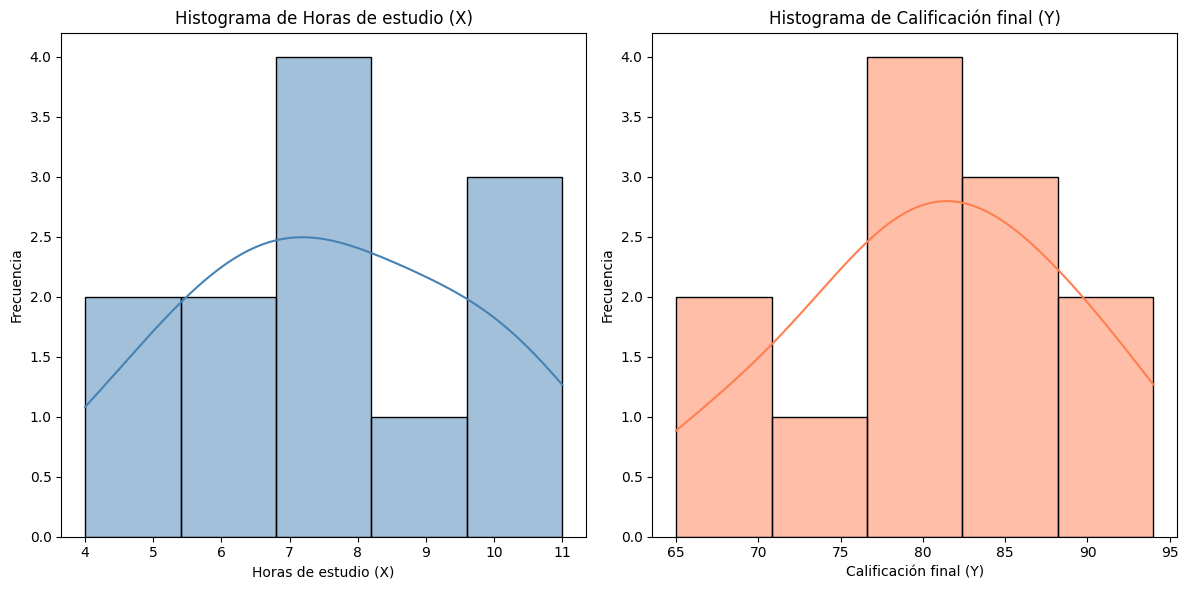

------------------------------
Generating Scatter Plot...


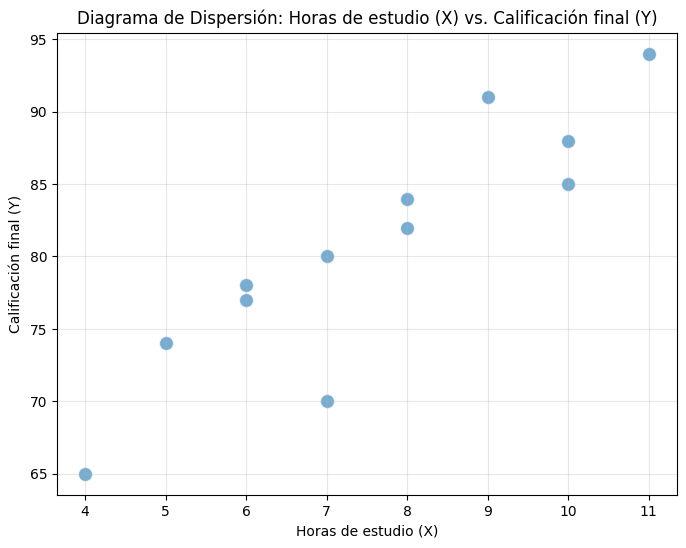

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Horas de estudio (X)': Statistics=0.971, p-value=0.924
Shapiro-Wilk test for 'Calificación final (Y)': Statistics=0.989, p-value=0.999

Interpretation of normality test results:
✓ The 'Horas de estudio (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Calificación final (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.8965
Kendall correlation coefficient: 0.8129
Spearman correlation coefficient: 0.9190
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.8965) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe

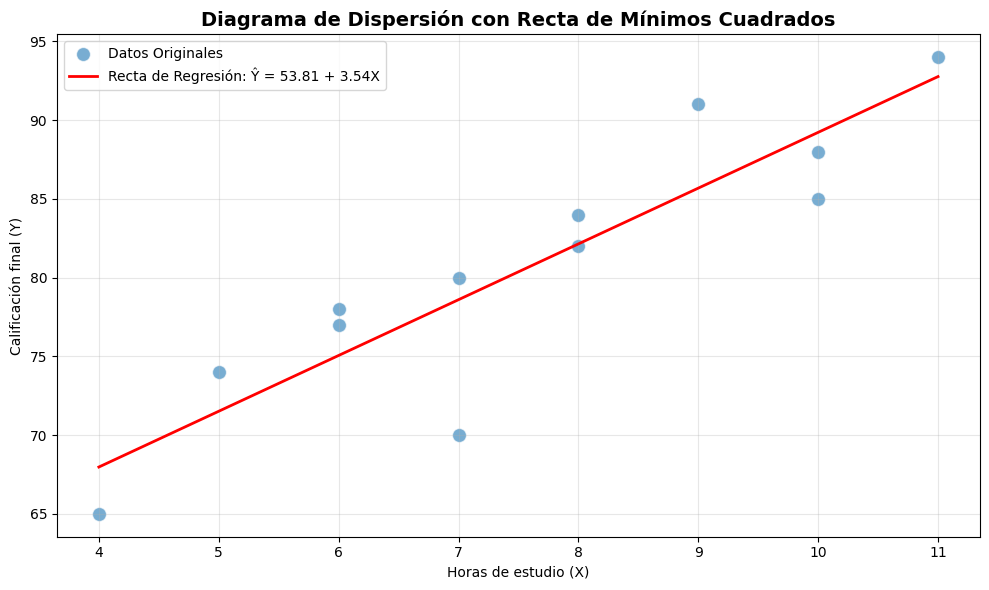


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β ≠ 0 (Existe una relación lineal significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 155.9738
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 3.9494

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 50.9167
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.5535

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (3.5417 - 0) / 0.5535
   t calculado = 6.3991

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 10
   Valor crítico (t, α/2=0.025): ±2.2281
   Valor p (dos colas) = 0.0001

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
|t calculado| (6.3991) > t crítico (2.2281)
valor p (0.0001) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de 

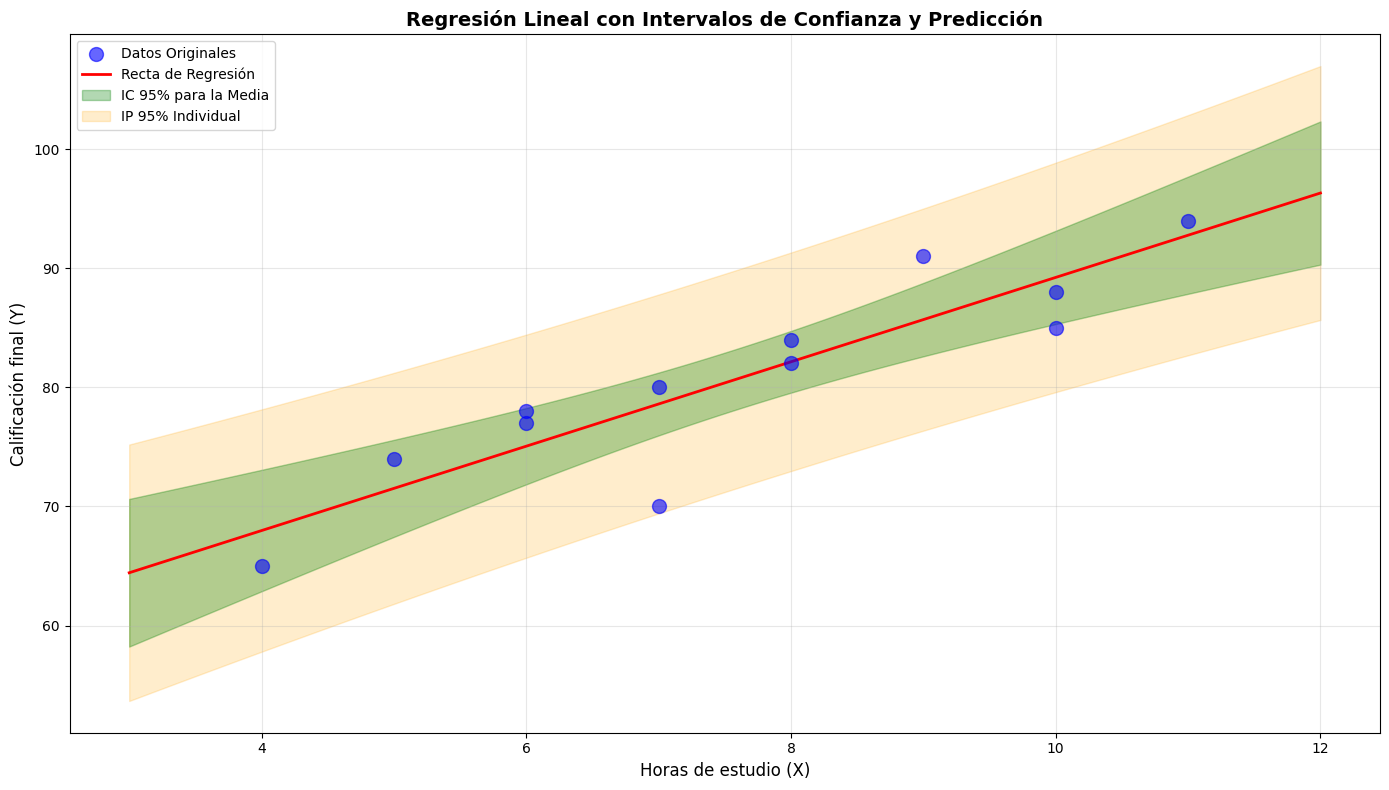

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Estudiante         X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Estudiante 1       4        65       67.98    -2.98      -0.75     
Estudiante 2       7        70       78.60    -8.60      -2.18     
Estudiante 3       10       85       89.23    -4.23      -1.07     
Estudiante 4       6        78       75.06    2.94       0.74      
Estudiante 5       8        82       82.14    -0.14      -0.04     
Estudiante 6       9        91       85.68    5.32       1.35      
Estudiante 7       5        74       71.52    2.48       0.63      
Estudiante 8       11       94       92.77    1.23       0.31      
Estudiante 9       7        80       78.60    1.40       0.35      
Estudiante 10      6        77       75.06    1.94       0.49      
Estudiante 11      8        84       82.14    1.86       0.47      
Estudiante 12      10    

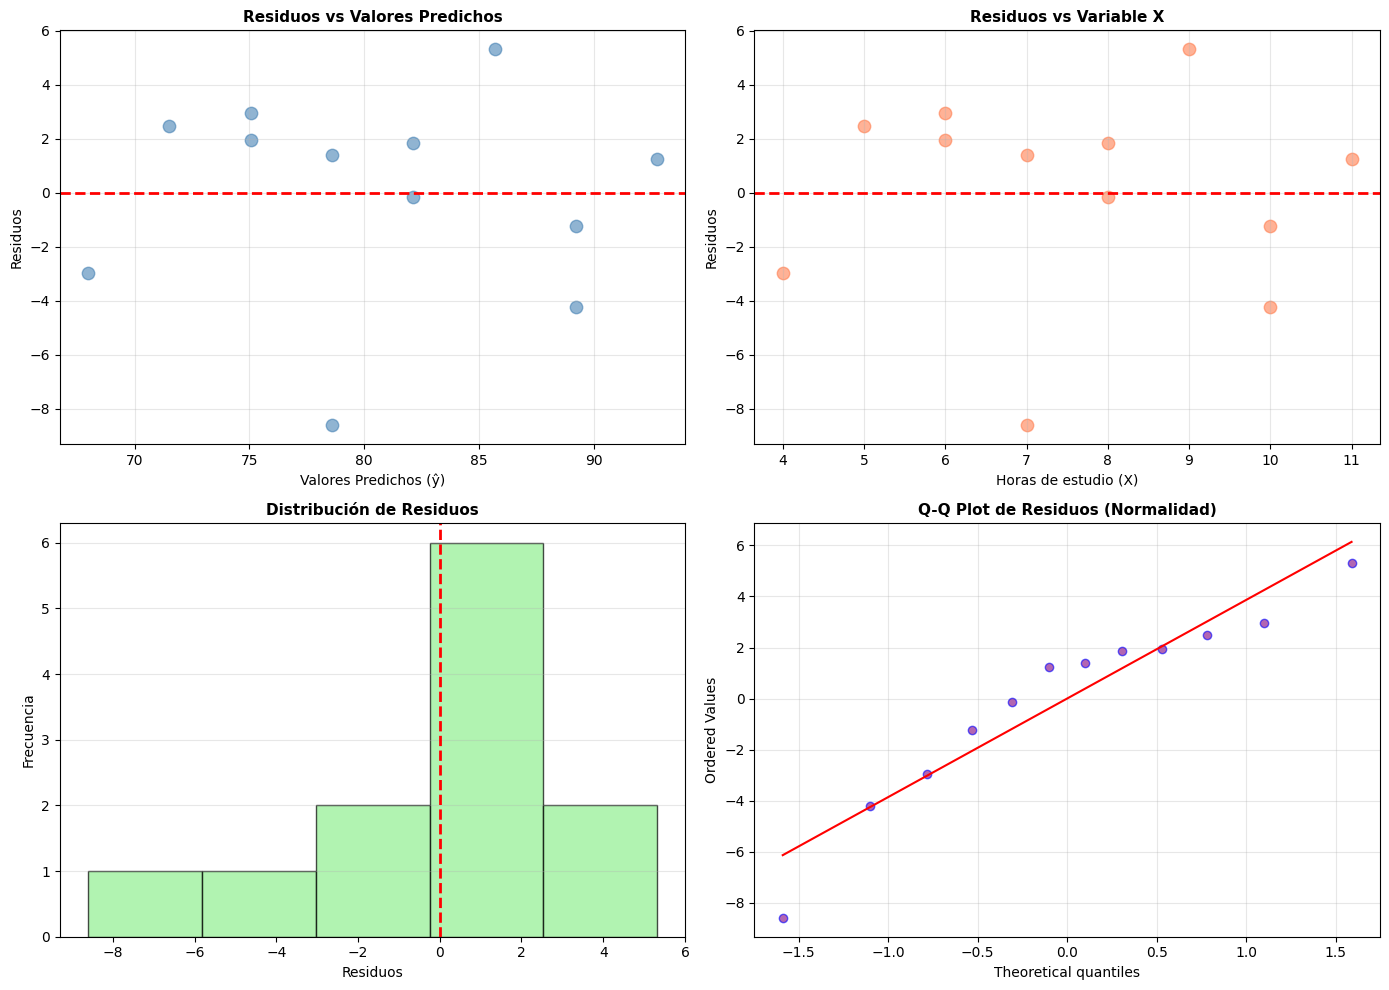


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9194
  Valor p = 0.2811
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Horas de estudio (X): p-value = 0.9239
     ✓ Distribución normal
   • Calificación final (Y): p-value = 0.9994
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.2811
     ✓ Distribución normal

3. HOMOCEDASTIC

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (HORAS DE ESTUDIO vs CALIFICACIÓN FINAL) ---
data = {
    'Estudiante': [
        f'Estudiante {i+1}' for i in range(12)
    ],
    'Horas de estudio (X)': [
        4, 7, 10, 6, 8, 9, 5, 11, 7, 6, 8, 10
    ],
    'Calificación final (Y)': [
        65, 70, 85, 78, 82, 91, 74, 94, 80, 77, 84, 88
    ]
}
df = pd.DataFrame(data)

variable_x = 'Horas de estudio (X)'
variable_y = 'Calificación final (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Horas de Estudio vs. Calificación Final")
print("=" * 70)
print(f"\nDatos cargados: {n} estudiantes")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_x.statistic:.3f}, p-value={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_y.statistic:.3f}, p-value={shapiro_test_y.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= {alfa}).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= {alfa}).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r**2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = f"✓ Existe una correlación lineal significativa (ρ ≠ 0) con p = {valor_p:.4f}."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = f"✗ No hay evidencia de una correlación lineal significativa (ρ = 0) con p = {valor_p:.4f}."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β != 0 (La pendiente es significativamente diferente de cero - dos colas)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de dos colas)
t_critico_pendiente = t.ppf(1 - alfa / 2, gl_pendiente)

# Valor p (prueba de dos colas)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t, α/2={alfa/2}): ±{t_critico_pendiente:.4f}")
print(f"   Valor p (dos colas) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    {variable_x} tiene un efecto significativo sobre {variable_y}.

    En términos prácticos: Por cada unidad adicional de {variable_x}, se espera un
    cambio de {b1:.4f} en {variable_y}, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que {variable_x} tenga
    un efecto significativo sobre {variable_y}.
    """

print(f"|t calculado| ({abs(t_calculado_pendiente):.4f}) {'>' if abs(t_calculado_pendiente) > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL DE LA PENDIENTE:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en {variable_y} puede │")
print(f"│  ser explicada por {variable_x}.                          │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
# Usar valores dentro del rango observado para predicciones más confiables
valores_x_ejemplo = [5, 8, 10]  # Ejemplos de horas de estudio

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de {variable_y}:\n")
print(f"{variable_x:<20} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 75)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para una media de {variable_x} de X,")
print(f"la MEDIA de {variable_y} estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para {variable_y} INDIVIDUALES:\n")
print(f"{variable_x:<20} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 75)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para un estudiante con X {variable_x},")
print(f"su {variable_y} INDIVIDUAL estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio para GRUPOS de estudiantes")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas para UN ESTUDIANTE")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 1, df[variable_x].max() + 1, 100) # Adjusted range for visualization
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

# Recalcular suma_desviaciones_x for the full range calculation if needed, though it's a sum over data points, not the range
# suma_desviaciones_x = ((df[variable_x] - mean_x) ** 2).sum() # Already calculated

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Estudiante':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Estudiante']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins='auto', edgecolor='black', alpha=0.7, color='lightgreen') # Adjusted bins for small dataset
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_x.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_x.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_y.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_y.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual y Levene)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# Prueba de Levene: split data by median of X
median_x_val = df[variable_x].median()
group1_res = df[df[variable_x] <= median_x_val]['residuos']
group2_res = df[df[variable_x] > median_x_val]['residuos']

if len(group1_res) > 1 and len(group2_res) > 1: # Ensure there are enough data points in each group
    levene_stat, levene_p = stats.levene(group1_res, group2_res)
    print(f"\n  Prueba de Levene (Homocedasticidad) - p-value: {levene_p:.4f}")
    if levene_p <= alfa:
        print(f"   ⚠ Posible heterocedasticidad (Levene p={levene_p:.4f})")
    else:
         print("  ✓ Homocedasticidad plausible (Levene p > 0.05)")
else:
    print("\n  ⚠ No se pudo realizar la prueba de Levene (pocos datos en grupos)")


# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Estudiantes con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Estudiante']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_x.pvalue <= alfa or shapiro_test_y.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if 'levene_p' in locals() and levene_p <= alfa:
     razones_transformacion.append(f"- Posible heterocedasticidad (Levene p={levene_p:.4f})")
     necesita_transformacion = True

if abs(r) < 0.5: # Adjusted threshold based on context
    razones_transformacion.append(f"- Correlación lineal moderada a débil (r = {r:.4f})")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # More than 15% are outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True


if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")
    elif shapiro_test_x.pvalue > alfa or shapiro_test_y.pvalue > alfa:
        print("  ✓ Al menos una variable original es aproximadamente normal")


    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if 'levene_p' in locals() and levene_p > alfa:
         print("  ✓ Homocedasticidad plausible")

    if abs(r) >= 0.5: # Adjusted threshold based on context
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")
    elif abs(r) >= 0.3: # Moderate correlation
         print(f"  ✓ La correlación lineal es moderada (r = {r:.4f}), aceptable para un modelo simple.")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")


    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} en {variable_y} cuando {variable_x} es 0.
   • Por cada unidad adicional de {variable_x}, se espera un cambio de {b1:.4f} en {variable_y}.

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad en {variable_y} explicada por {variable_x}

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} en {variable_y}

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}{f' | Levene p={levene_p:.4f}' if 'levene_p' in locals() else ''}
   • Outliers: {len(outliers)}/{n} casos > 2.5 Std. Residuo → {'✓ Aceptable' if len(outliers) <= n*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa and not necesita_transformacion:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   {variable_x} es un predictor SIGNIFICATIVO de {variable_y}.
   El modelo explica el {r_cuadrado*100:.2f}% de la variabilidad y puede
   utilizarse con confianza para:

   • Entender la relación lineal entre {variable_x} y {variable_y}.
   • Realizar predicciones de {variable_y} basadas en {variable_x}.

   Recomendación: Utilizar este modelo para análisis y predicciones relacionadas
   con el rendimiento académico basado en horas de estudio.
""")
elif valor_p_pendiente < alfa and valor_p_f < alfa and necesita_transformacion:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas de significancia son positivas, el análisis de supuestos
   indica que el modelo puede tener limitaciones. Se recomienda:

   • Considerar TRANSFORMACIONES DE DATOS (ver recomendaciones arriba) para
     mejorar el ajuste del modelo y la validez de los supuestos.
   • Recolectar más datos para obtener resultados más robustos.
   • Investigar las causas de los problemas identificados (ej. heterocedasticidad, outliers).
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo de regresión lineal simple no es estadísticamente confiable
   para predecir {variable_y} basándose únicamente en {variable_x}.
   Se recomienda:

   • Recolectar más datos o mejorar la calidad de los datos.
   • Considerar otras variables explicativas que puedan influir en {variable_y}.
   • Explorar modelos alternativos (no lineal, multivariado) si la relación
     no es lineal o hay otros factores importantes.
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ejercicio 1

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Goles Anotados vs. Goles Recibidos

Datos cargados: 6 equipos
Variable independiente (X): Goles anotados (X)
Variable dependiente (Y): Goles recibidos (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


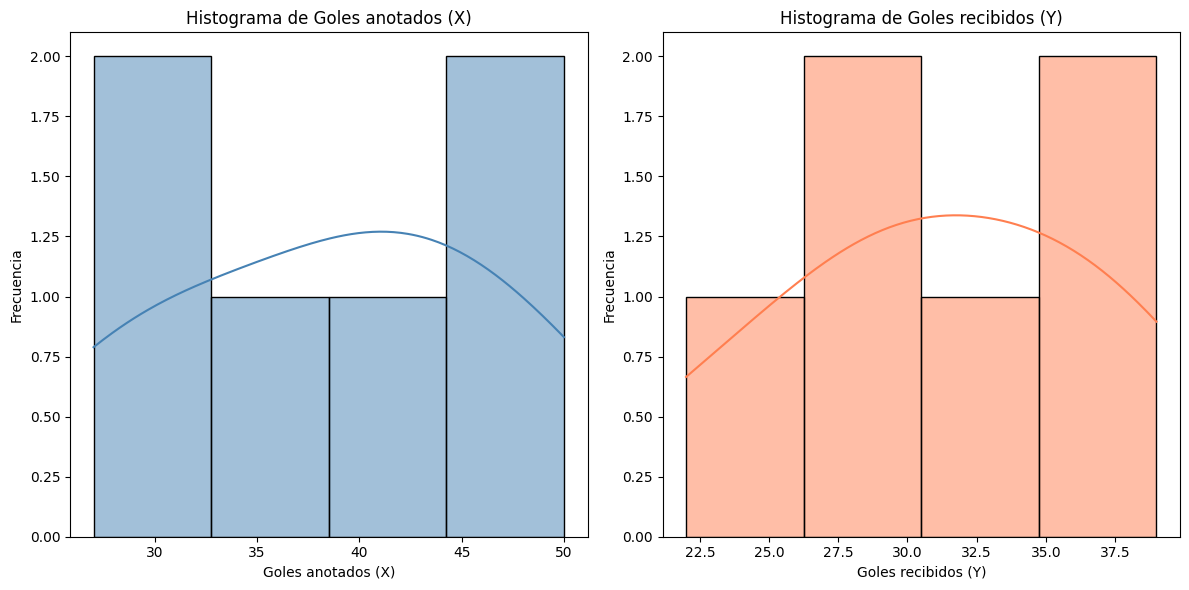

------------------------------
Generating Scatter Plot...


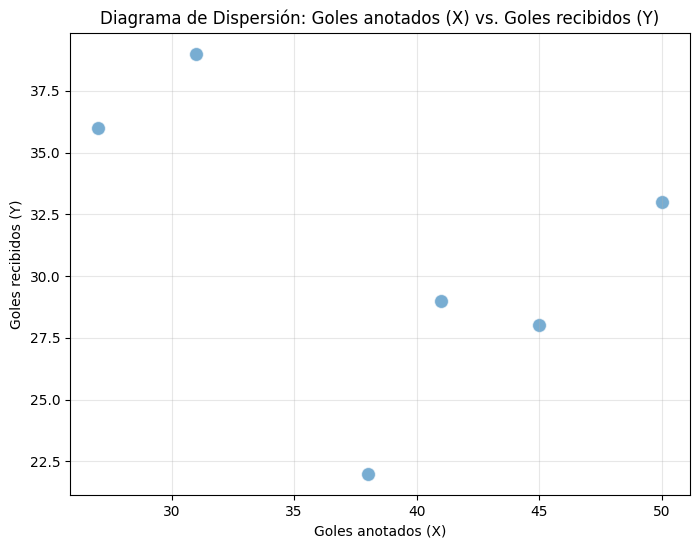

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Goles anotados (X)': Statistics=0.976, p-value=0.928
Shapiro-Wilk test for 'Goles recibidos (Y)': Statistics=0.980, p-value=0.950

Interpretation of normality test results:
✓ The 'Goles anotados (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Goles recibidos (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: -0.4365
Kendall correlation coefficient: -0.2000
Spearman correlation coefficient: -0.4286
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (-0.4365) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe corre

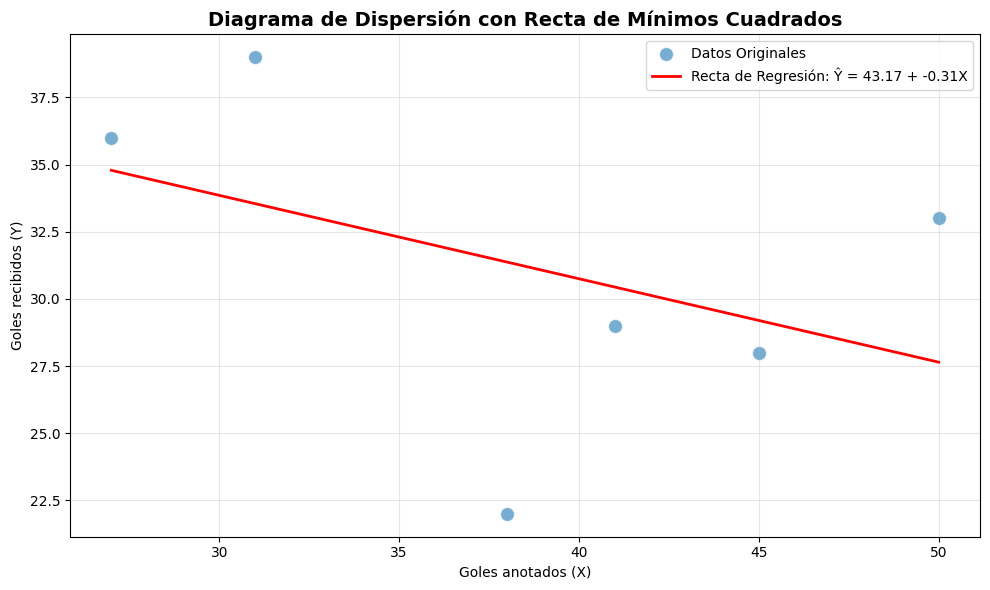


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β ≠ 0 (Existe una relación lineal significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 151.2329
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 6.1488

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 369.3333
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.3200

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (-0.3105 - 0) / 0.3200
   t calculado = -0.9704

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 4
   Valor crítico (t, α/2=0.025): ±2.7764
   Valor p (dos colas) = 0.3868

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
|t calculado| (0.9704) < t crítico (2.7764)
valor p (0.3868) ≥ α (0.05)

DECISIÓN: NO RECHAZAR H0
INTERPRETACIÓN: ✗ La pendiente NO es significativamente difer

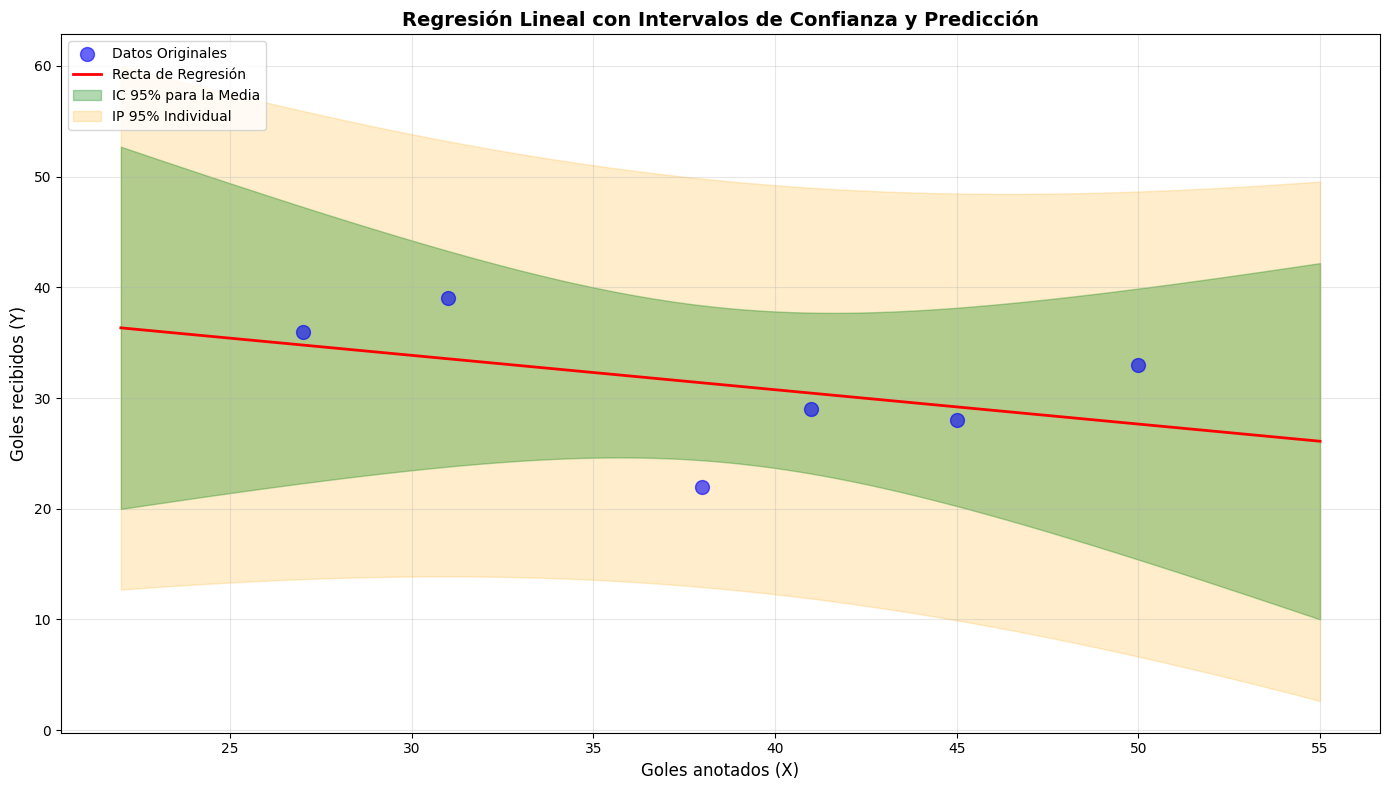

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Equipo             X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Leones             38       22       31.37    -9.37      -1.52     
Águilas            45       28       29.20    -1.20      -0.20     
Tigres             31       39       33.55    5.45       0.89      
Toros              50       33       27.65    5.35       0.87      
Pumas              27       36       34.79    1.21       0.20      
Jaguares           41       29       30.44    -1.44      -0.23     

Estadísticas de los Residuos:
  Media de residuos: -0.0000 (debe ser ≈ 0)
  Desviación estándar: 5.4997
  Residuo mínimo: -9.3736
  Residuo máximo: 5.4531


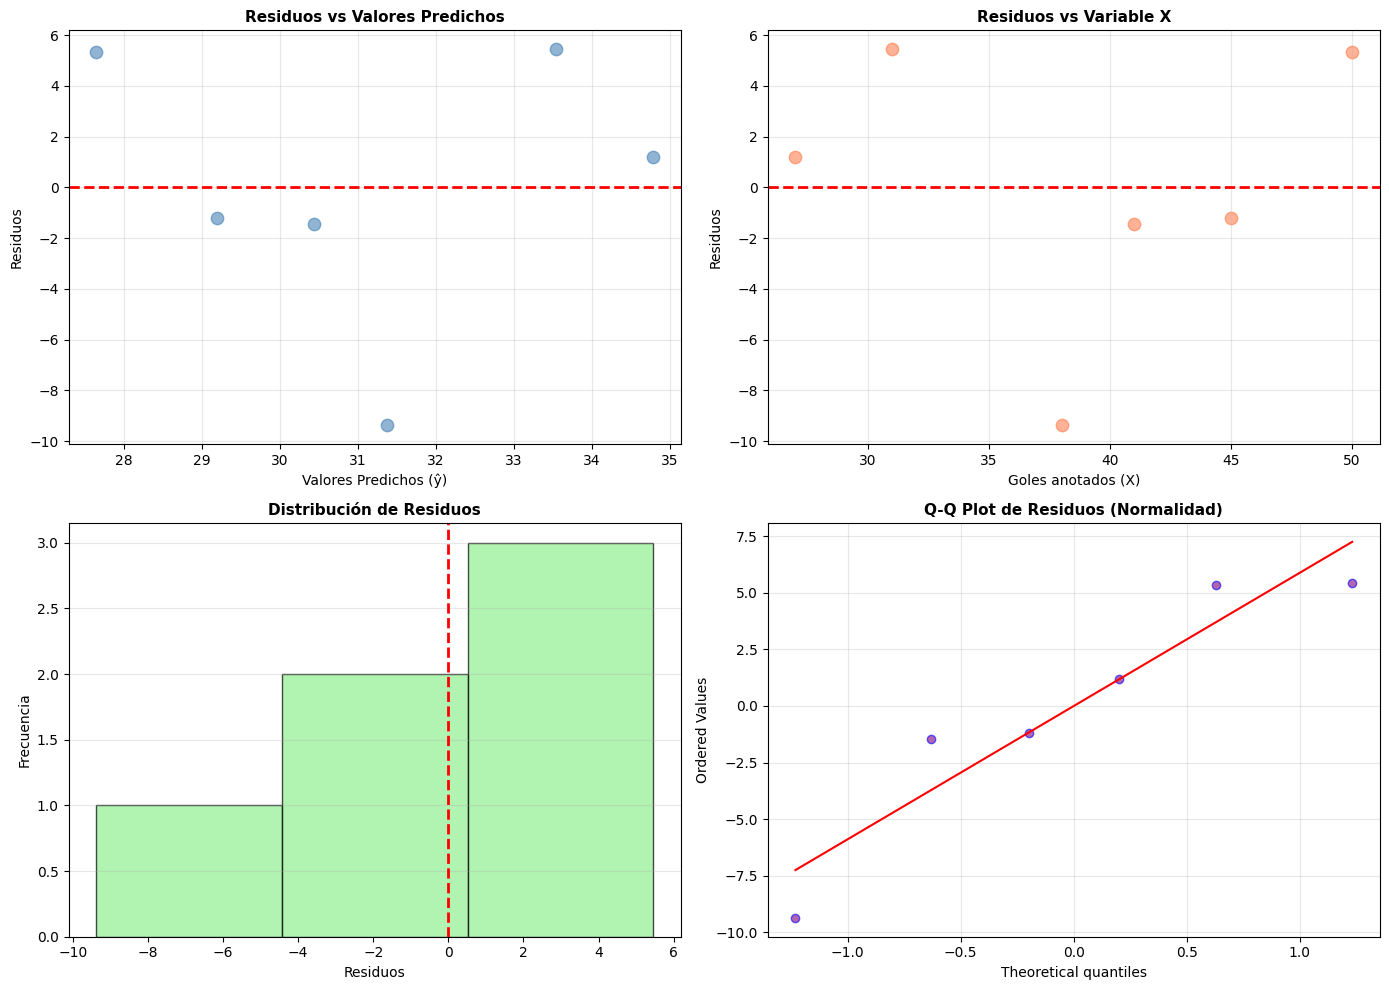


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.8979
  Valor p = 0.3619
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Goles anotados (X): p-value = 0.9283
     ✓ Distribución normal
   • Goles recibidos (Y): p-value = 0.9500
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.3619
     ✓ Distribución normal

3. HOMOCEDASTICIDAD 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (GOLES ANOTADOS Y RECIBIDOS) ---
data = {
    'Equipo': [
        'Leones', 'Águilas', 'Tigres', 'Toros', 'Pumas', 'Jaguares'
    ],
    'Goles anotados (X)': [
        38, 45, 31, 50, 27, 41
    ],
    'Goles recibidos (Y)': [
        22, 28, 39, 33, 36, 29
    ]
}
df = pd.DataFrame(data)

variable_x = 'Goles anotados (X)'
variable_y = 'Goles recibidos (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Goles Anotados vs. Goles Recibidos")
print("=" * 70)
print(f"\nDatos cargados: {n} equipos")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_calls.statistic:.3f}, p-value={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_sold.statistic:.3f}, p-value={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= {alfa}).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > {alfa}).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= {alfa}).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = f"✓ Existe una correlación lineal significativa (ρ ≠ 0) con p = {valor_p:.4f}."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = f"✗ No hay evidencia de una correlación lineal significativa (ρ = 0) con p = {valor_p:.4f}."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X (Goles anotados) y Y (Goles recibidos)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β != 0 (La pendiente es significativamente diferente de cero - dos colas)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de dos colas)
t_critico_pendiente = t.ppf(1 - alfa / 2, gl_pendiente)

# Valor p (prueba de dos colas)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t, α/2={alfa/2}): ±{t_critico_pendiente:.4f}")
print(f"   Valor p (dos colas) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de goles anotados tiene un efecto significativo sobre el
    número de goles recibidos.

    En términos prácticos: Por cada gol anotado adicional, se espera un
    cambio de {b1:.4f} en los goles recibidos, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de goles
    anotados tenga un efecto significativo sobre el número de goles recibidos.
    """

print(f"|t calculado| ({abs(t_calculado_pendiente):.4f}) {'>' if abs(t_calculado_pendiente) > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL DE LA PENDIENTE:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en el número de            │")
print(f"│  goles recibidos puede ser explicada por el número de goles     │")
print(f"│  anotados.                                                      │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X (Goles Anotados)
# Usar valores dentro del rango observado para predicciones más confiables
valores_x_ejemplo = [30, 40, 50]  # Ejemplos de goles anotados

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de goles recibidos:\n")
print(f"{'X (Goles Anotados)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 75)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para equipos con X goles anotados,")
print("la MEDIA de goles recibidos estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para goles recibidos INDIVIDUALES:\n")
print(f"{'X (Goles Anotados)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 75)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para un equipo con X goles anotados,")
print("sus goles recibidos INDIVIDUALES estarán dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio para GRUPOS de equipos")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas para UN EQUIPO")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 5, df[variable_x].max() + 5, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

# Recalcular suma_desviaciones_x for the full range calculation if needed, though it's a sum over data points, not the range
# suma_desviaciones_x = ((df[variable_x] - mean_x) ** 2).sum() # Already calculated

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Equipo':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Equipo']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen') # Adjusted bins for small dataset
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Equipos con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Equipo']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append(f"- Correlación lineal débil (r = {r:.4f})")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # Más del 15% son outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

# Visual check for heteroscedasticity on Residuos vs Predichos plot is important
# This is subjective, but Levene test can provide some indication (though it needs groups)

# Simplified Levene test implementation idea (split data by median of X):
median_x_val = df[variable_x].median()
group1_res = df[df[variable_x] <= median_x_val]['residuos']
group2_res = df[df[variable_x] > median_x_val]['residuos']

if len(group1_res) > 1 and len(group2_res) > 1: # Ensure there are enough data points in each group
    levene_stat, levene_p = stats.levene(group1_res, group2_res)
    print(f"\n  Prueba de Levene (Homocedasticidad) - p-value: {levene_p:.4f}")
    if levene_p <= alfa:
        razones_transformacion.append(f"- Posible heterocedasticidad (Levene p={levene_p:.4f})")
        necesita_transformacion = True
    else:
         print("  ✓ Homocedasticidad plausible (Levene p > 0.05)")
else:
    print("\n  ⚠ No se pudo realizar la prueba de Levene (pocos datos en grupos)")


if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")
    elif shapiro_test_calls.pvalue > alfa or shapiro_test_sold.pvalue > alfa:
        print("  ✓ Al menos una variable original es aproximadamente normal")


    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")
    elif abs(r) >= 0.4:
         print(f"  ✓ La correlación lineal es moderada (r = {r:.4f}), pero aceptable para un modelo simple.")


    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    if 'levene_p' in locals() and levene_p > alfa:
         print("  ✓ Homocedasticidad plausible")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} goles recibidos
   • Por cada gol anotado adicional, se espera un cambio de {b1:.4f} en los goles recibidos.

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad en goles recibidos explicada por goles anotados

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} goles

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}{f' | Levene p={levene_p:.4f}' if 'levene_p' in locals() else ''}
   • Outliers: {len(outliers)}/{n} casos > 2.5 Std. Residuo → {'✓ Aceptable' if len(outliers) <= n*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa and not necesita_transformacion:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El número de goles anotados es un predictor SIGNIFICATIVO del
   número de goles recibidos. El modelo explica el {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Entender la relación lineal entre goles anotados y recibidos.
   • Realizar predicciones de goles recibidos basadas en goles anotados.

   Recomendación: Utilizar este modelo para análisis de rendimiento de equipos
   y planificación estratégica.
""")
elif valor_p_pendiente < alfa and valor_p_f < alfa and necesita_transformacion:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas de significancia son positivas, el análisis de supuestos
   indica que el modelo puede tener limitaciones. Se recomienda:

   • Considerar TRANSFORMACIONES DE DATOS (ver recomendaciones arriba) para
     mejorar el ajuste del modelo y la validez de los supuestos.
   • Recolectar más datos para obtener resultados más robustos.
   • Investigar las causas de los problemas identificados (ej. heterocedasticidad, outliers).
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo de regresión lineal simple no es estadísticamente confiable
   para predecir el número de goles recibidos basándose únicamente en
   el número de goles anotados. Se recomienda:

   • Recolectar más datos o mejorar la calidad de los datos.
   • Considerar otras variables explicativas que puedan influir en los goles recibidos.
   • Explorar modelos alternativos (no lineal, multivariado) si la relación
     no es lineal o hay otros factores importantes.
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)